In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
all_files = []
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        all_files.append(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from tabulate import tabulate

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from tqdm import tqdm

sns.set_theme()

In [209]:
[f for f in all_files if 'shp' in f]

['/kaggle/input/hack-ai-gucodd/Векторные данные/Streets_3очередь.shp',
 '/kaggle/input/hack-ai-gucodd/Векторные данные/Streets_исходные.shp',
 '/kaggle/input/hack-ai-gucodd/Векторные данные/Дома_исходные.shp',
 '/kaggle/input/hack-ai-gucodd/Векторные данные/Остановки_ОТ.shp',
 '/kaggle/input/hack-ai-gucodd/Векторные данные/Streets_2очередь.shp',
 '/kaggle/input/hack-ai-gucodd/Векторные данные/House_1очередь_ЖК.shp',
 '/kaggle/input/hack-ai-gucodd/Векторные данные/Streets_1очередь.shp',
 '/kaggle/input/hack-ai-gucodd/Векторные данные/House_3очередь_ЖК.shp',
 '/kaggle/input/hack-ai-gucodd/Векторные данные/Выходы_метро.shp',
 '/kaggle/input/hack-ai-gucodd/Векторные данные/House_2очередь_ЖК.shp']

In [3]:
import geopandas as gpd

# Загрузка Shapefile
house_base = '/kaggle/input/hack-ai-gucodd/Векторные данные/Дома_исходные.shp'
street_base = '/kaggle/input/hack-ai-gucodd/Векторные данные/Streets_исходные.shp'
ot_base = '/kaggle/input/hack-ai-gucodd/Векторные данные/Остановки_ОТ.shp'
metro_base = '/kaggle/input/hack-ai-gucodd/Векторные данные/Выходы_метро.shp'
gdf_house = gpd.read_file(house_base)
gdf_street = gpd.read_file(street_base)
gdf_ot = gpd.read_file(ot_base)
gdf_metro = gpd.read_file(metro_base)

In [4]:
house_base_f = '/kaggle/input/hack-ai-gucodd/Векторные данные/House_1очередь_ЖК.shp'
street_base_f = '/kaggle/input/hack-ai-gucodd/Векторные данные/Streets_1очередь.shp'
gdf_house_f = gpd.read_file(house_base_f)
gdf_street_f = gpd.read_file(street_base_f)

# EDA

In [212]:
def print_null_cols(df):
    cols_with_missing = [col for col in df.columns
                         if df[col].isnull().any()]

    col_null_count = []
    for col in cols_with_missing:
        null_count = df[col].isnull().sum()
        col_null_count.append([
            col, 
            null_count,
            round(null_count / len(df[col]), 2),
            df[col].dtype
        ])

    col_null_count.sort(key=lambda x: x[1])
    print(tabulate(col_null_count, headers=['Col', 'Null Count', 'Null %', 'Type']))

In [213]:
def print_col_info(df):
    uniq_col_count = []
    for col in df:
        uniq_count = df[col].unique()
        types = set([type(x) for x in uniq_count])
        uniq_col_count.append([col, len(uniq_count), uniq_count[:10], types])

    uniq_col_count.sort(key=lambda x: x[1])

    print(tabulate(uniq_col_count, headers=['Col', 'Uniq_num', 'Values (top 10)', 'Types']))

## Houses

In [214]:
gdf_house.head()

Name        Type Caption                Purpose PostIndex  Elevation  \
0  None  Жилые дома    None               Таунхаус    108803        2.0   
1  None  Жилые дома    None              Жилой дом    108803       10.0   
2  None  Жилые дома    None              Жилой дом    108803        9.0   
3  None  Жилые дома    None  Малоэтажный жилой дом    108803        3.0   
4  None  Жилые дома    None  Малоэтажный жилой дом    108803        3.0   

   Entrances  Apartments    District        DistrictId  ... StreetId2 Number2  \
0        NaN         NaN  Коммунарка  4504209520926899  ...      None    None   
1        3.0       108.0  Коммунарка  4504209520926899  ...      None    None   
2        2.0        67.0  Коммунарка  4504209520926899  ...      None    None   
3        3.0        18.0  Коммунарка  4504209520926899  ...      None    None   
4        2.0        24.0  Коммунарка  4504209520926899  ...      None    None   

  Street3 StreetId3 Number3 Street4 StreetId4 Number4     Material  \
0    None      None    None    None      None    None  Железобетон   
1    None      None    None    None      None    None       Панель   
2    None      None    None    None      None    None       Кирпич   
3    None      None    None    None      None    None       Кирпич   
4    None      None    None    None      None    None       Кирпич   

                                            geometry  
0  POLYGON ((4165306.350 7463920.690, 4165286.050...  
1  POLYGON ((4167970.750 7465703.440, 4167992.170...  
2  MULTIPOLYGON (((4168473.520 7465603.510, 41684...  
3  POLYGON ((4168258.380 7464679.750, 4168150.510...  
4  POLYGON ((4168562.630 7464563.770, 4168503.490...  

[5 rows x 29 columns]

In [215]:
print(print_null_cols(gdf_house))

Col           Null Count    Null %  Type
----------  ------------  --------  -------
Elevation              1      0     float64
PostIndex            259      0.02  object
Material            1644      0.1   object
Street              3168      0.19  object
Number              3168      0.19  object
City                6809      0.42  object
CityId              6809      0.42  object
StreetId1          11739      0.72  object
Entrances          15871      0.97  float64
Apartments         15875      0.97  float64
Street2            15979      0.98  object
Number2            15979      0.98  object
StreetId2          16224      0.99  object
Name               16293      0.99  object
Street3            16376      1     object
Number3            16376      1     object
Caption            16386      1     object
Okato              16386      1     object
Oktmo              16386      1     object
StreetId3          16386      1     object
Street4            16386      1     object
StreetId4

In [216]:
gdf_house[['Apartments', 'Type']].groupby('Type').mean()

Apartments
Type                                   
Административные сооружения  346.666667
Дома_новостройки             156.000000
Дошкольные                          NaN
Жилые дома                   205.932673
Известный по назначению             NaN
Киоски                              NaN
Навес                               NaN
Частные дома                   2.500000
Школы                               NaN

In [5]:
gdf_house.loc[gdf_house['Type'] == 'Частные дома', 'Apartments'] = gdf_house.loc[gdf_house['Type'] == 'Частные дома', 'Apartments'].fillna(2.5)
gdf_house.loc[gdf_house['Type'] == 'Частные дома', 'Apartments'] = gdf_house.loc[gdf_house['Type'] == 'Частные дома', 'Apartments'].replace(0, 2.5)
gdf_house.loc[gdf_house['Type'] == 'Жилые дома', 'Apartments'] = gdf_house.loc[gdf_house['Type'] == 'Жилые дома', 'Apartments'].fillna(206)
gdf_house.loc[gdf_house['Type'] == 'Жилые дома', 'Apartments'] = gdf_house.loc[gdf_house['Type'] == 'Жилые дома', 'Apartments'].replace(0, 206)
gdf_house[gdf_house['Type'] == 'Дома_новостройки']['Apartments'] = gdf_house.loc[gdf_house['Type'] == 'Дома_новостройки', 'Apartments'].fillna(156)
gdf_house.loc[gdf_house['Type'] == 'Дома_новостройки', 'Apartments'] = gdf_house.loc[gdf_house['Type'] == 'Дома_новостройки', 'Apartments'].replace(0, 156)
gdf_house['Apartments'] = gdf_house['Apartments'].fillna(0)

/opt/conda/lib/python3.10/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [327]:
gdf_house.loc[gdf_house['Type'] == 'Дома_новостройки', 'Apartments']

16213    156.0
16214    156.0
16215    156.0
16216    156.0
16217    156.0
         ...  
16339    156.0
16340    156.0
16341    156.0
16342    156.0
16343    156.0
Name: Apartments, Length: 131, dtype: float64

In [6]:
gdf_house['persons'] = gdf_house['Apartments'] * 3

In [219]:
print_col_info(gdf_house)

Col           Uniq_num  Values (top 10)                                                            Types
----------  ----------  -------------------------------------------------------------------------  --------------------------------------------------------------------------------------------------
Caption              1  [None]                                                                     {<class 'NoneType'>}
District             1  ['Коммунарка']                                                             {<class 'str'>}
DistrictId           1  ['4504209520926899']                                                       {<class 'str'>}
Okato                1  [None]                                                                     {<class 'NoneType'>}
Oktmo                1  [None]                                                                     {<class 'NoneType'>}
StreetId3            1  [None]                                                                     {<class 

In [7]:
gdf_house = gdf_house.drop(columns=['Caption', 'District', 'DistrictId', 'Okato', 'Oktmo', 'StreetId3', 'Street4',
                                    'StreetId4', 'Number4', 'Street3', 'Name', 'Apartments', 'Entrances', 'StreetId1',
                                    'CityId', 'City', 'Street2', 'Number2', 'StreetId2', 'Number3'])

## Streets

In [221]:
gdf_street.head()

EdgeId ST_NAME ST_TYP_BEF ST_NM_BASE ST_NM_CITY  FUNC_CLASS  \
0   13604    None       None       None       None           6   
1   13680    None       None       None       None           6   
2   13686    None       None       None       None           6   
3   13741    None       None       None       None           6   
4   13788    None       None       None       None           6   

                  ROAD_CATEG  F_ZLEV  T_ZLEV      TYPE_LINK  ... AvgSpdDrct  \
0  Внутриквартальные проезды       0       0  Обычное звено  ...         20   
1  Внутриквартальные проезды       0       0  Обычное звено  ...         20   
2  Внутриквартальные проезды       0       0  Обычное звено  ...         20   
3  Внутриквартальные проезды       0       0  Обычное звено  ...         20   
4  Внутриквартальные проезды       0       0  Обычное звено  ...         20   

   MaxSpdRvrs  AvgSpdRvrs  Foot Car  duplicat  payment material   length  \
0          20          20     1   1      None     None     None   39.794   
1          20          20     1   1      None     None     None   50.849   
2          20          20     1   1      None     None     None   52.461   
3          20          20     1   1      None     None     None  110.147   
4          20          20     1   1      None     None     None  214.529   

                                            geometry  
0  LINESTRING (4169313.050 7459602.180, 4169363.2...  
1  LINESTRING (4169368.910 7459679.520, 4169357.1...  
2  LINESTRING (4167431.360 7459646.240, 4167516.4...  
3  LINESTRING (4169499.070 7459820.140, 4169493.5...  
4  LINESTRING (4169053.720 7459877.540, 4169260.2...  

[5 rows x 31 columns]

In [222]:
print(print_null_cols(gdf_street))

Col           Null Count    Null %  Type
----------  ------------  --------  -------
Width               9958      0.37  float64
RbndStght          10097      0.37  float64
RbndBck            10779      0.4   float64
ST_NAME            24105      0.89  object
ST_TYP_BEF         24105      0.89  object
ST_NM_BASE         24105      0.89  object
ST_NM_CITY         25749      0.95  object
material           26584      0.98  object
duplicat           26887      0.99  object
TrackNames         27008      0.99  object
TopoNames1         27103      1     object
payment            27188      1     object
None


In [8]:
gdf_street = gdf_street.drop(columns=['payment', 'TopoNames1', 'TrackNames', 'duplicat', 'material', 'ST_NM_CITY', 'ST_NM_BASE',
                                      'ST_TYP_BEF', 'ST_NAME', 'RbndBck'])

In [224]:
print_col_info(gdf_street)

Col           Uniq_num  Values (top 10)                                                             Types
----------  ----------  --------------------------------------------------------------------------  --------------------------------------------------
IsFerry              1  ['F']                                                                       {<class 'str'>}
Foot                 2  [1 0]                                                                       {<class 'numpy.int64'>}
Car                  2  [1 0]                                                                       {<class 'numpy.int64'>}
TYPE_LINK            3  ['Обычное звено' 'Соединение' 'Круговое движение']                          {<class 'str'>}
RoadDirect           3  ['Any' 'F' 'T']                                                             {<class 'str'>}
U_TURN               3  [3 0 1]                                                                     {<class 'numpy.int64'>}
F_ZLEV               4 

In [9]:
gdf_street = gdf_street.drop(columns=['IsFerry', 'OriginId'])

## OT

In [226]:
gdf_ot.head()

TrType                      Name          TrStopId  \
0  Автобусная остановка                д. Дудкино  4504282527175082   
1  Автобусная остановка        Академика Семёнова  4504282527177280   
2  Автобусная остановка           СНТ Гавриково-1  4504282527177281   
3  Автобусная остановка  СНТ Берёзка-Коммунарка-1  4504282549350453   
4  Автобусная остановка  СНТ Берёзка-Коммунарка-1  4504282549350455   

                          geometry  
0  POINT (4169298.800 7486206.480)  
1  POINT (4175492.120 7468089.680)  
2  POINT (4174773.190 7467701.780)  
3  POINT (4173317.020 7470985.860)  
4  POINT (4173231.610 7471209.380)

In [227]:
print(print_null_cols(gdf_ot))

Col    Null Count    Null %    Type
-----  ------------  --------  ------
None


In [228]:
print_col_info(gdf_ot)

Col         Uniq_num  Values (top 10)                                            Types
--------  ----------  ---------------------------------------------------------  ----------------------------------------
TrType             1  ['Автобусная остановка']                                   {<class 'str'>}
Name              34  ['д. Дудкино' 'Академика Семёнова' 'СНТ Гавриково-1'       {<class 'str'>}
                       'СНТ Берёзка-Коммунарка-1' 'СНТ Юннат-2 (по требованию)'
                       'Микрорайон Бутовские аллеи' 'Бунинские луга' 'Школа'
                       'Проектируемый проезд №7048' 'Ивановское кладбище']
TrStopId          61  ['4504282527175082' '4504282527177280' '4504282527177281'  {<class 'str'>}
                       '4504282549350453' '4504282549350455' '4504282549350480'
                       '4504282549350484' '4504282549350580' '4504282549350584'
                       '70030076945308810']
geometry          61  <GeometryArray>                           

In [10]:
gdf_ot = gdf_ot.drop(columns=['TrType'])

## Metro

In [230]:
gdf_metro.head()

Number      Text                         geometry
0      7  Потапово  POINT (4173365.250 7470052.910)
1      6  Потапово  POINT (4173441.380 7470047.670)
2      5  Потапово  POINT (4173487.050 7469711.730)
3      3  Потапово  POINT (4173976.090 7469745.930)
4      4  Потапово  POINT (4174093.740 7469755.220)

In [231]:
print(print_null_cols(gdf_metro))

Col    Null Count    Null %    Type
-----  ------------  --------  ------
None


In [232]:
print_col_info(gdf_metro)

Col         Uniq_num  Values (top 10)                                            Types
--------  ----------  ---------------------------------------------------------  ----------------------------------------
Text               1  ['Потапово']                                               {<class 'str'>}
Number             7  ['7' '6' '5' '3' '4' '2' '1']                              {<class 'str'>}
geometry           7  <GeometryArray>                                            {<class 'shapely.geometry.point.Point'>}
                      Length: 7, dtype: geometry


In [11]:
gdf_metro = gdf_metro.drop(columns=['Text'])

## House Future

In [234]:
gdf_house_f.head()

Type                Purpose  Elevation  Entrances  Apartments  \
0  Жилые дома  Малоэтажный жилой дом          3        4.0        86.0   
1  Жилые дома  Малоэтажный жилой дом          3        4.0        86.0   
2  Жилые дома  Малоэтажный жилой дом          3        4.0        86.0   
3  Жилые дома  Малоэтажный жилой дом          3        4.0        86.0   
4  Жилые дома  Малоэтажный жилой дом          3        3.0        98.0   

     District            Street Number  \
0  Коммунарка  Потаповская Роща   2 к3   
1  Коммунарка  Потаповская Роща   1 к2   
2  Коммунарка  Потаповская Роща   1 к1   
3  Коммунарка  Потаповская Роща   3 к1   
4  Коммунарка  Потаповская Роща   2 к4   

                                            geometry  
0  POLYGON ((4174099.000 7468553.820, 4174054.110...  
1  POLYGON ((4173865.000 7468327.020, 4173908.890...  
2  POLYGON ((4174008.050 7468232.570, 4173991.510...  
3  POLYGON ((4173744.260 7468440.360, 4173741.920...  
4  POLYGON ((4174166.950 7468519.720, 4174167.880...

In [235]:
print(print_null_cols(gdf_house_f))

Col           Null Count    Null %  Type
----------  ------------  --------  -------
Street                13      0.29  object
Number                13      0.29  object
Entrances             15      0.33  float64
Apartments            15      0.33  float64
None


In [12]:
gdf_house_f['Apartments'] = gdf_house_f['Apartments'].fillna(gdf_house_f['Apartments'].mean())
gdf_house_f['Apartments'] = gdf_house_f['Apartments'].replace(0, gdf_house_f['Apartments'].mean())
gdf_house_f['persons'] = gdf_house_f['Apartments'] * 3

In [237]:
print_col_info(gdf_house_f)

Col           Uniq_num  Values (top 10)                                                            Types
----------  ----------  -------------------------------------------------------------------------  --------------------------------------------------------------------------------------------------
District             1  ['Коммунарка']                                                             {<class 'str'>}
Type                 2  ['Жилые дома' 'Известный по назначению']                                   {<class 'str'>}
Street               4  ['Потаповская Роща' 'Александры Монаховой' 'Куприна проспект' None]        {<class 'NoneType'>, <class 'str'>}
Purpose              5  ['Малоэтажный жилой дом' 'Жилой дом' 'Хозяйственный корпус' 'Сооружение'   {<class 'str'>}
                         'Автостоянка']
Elevation            6  [ 3 18 17  1  5  4]                                                        {<class 'numpy.int64'>}
Entrances            7  [ 4.  3.  6.  2.  1.  5. nan] 

In [13]:
gdf_house_f = gdf_house_f.drop(columns=['District'])

## Street Future

In [239]:
gdf_street_f.head()

ST_NAME ST_TYP_BEF            ST_NM_BASE  \
0                         None       None                  None   
1  Проектируемый 7048-й проезд     проезд  Проектируемый 7048-й   
2                         None       None                  None   
3                         None       None                  None   
4                         None       None                  None   

                   ROAD_CATEG RoadDirect  RbndStght  RbndBck  Width  \
0         Прочие улицы города          T        1.0      1.0    6.0   
1  Магистральные улицы города        Any        2.0      2.0   12.0   
2         Прочие улицы города          F        1.0      1.0    6.0   
3  Магистральные улицы города          F        2.0      1.0    9.0   
4         Прочие улицы города          T        1.0      1.0    6.0   

   MaxSpdDrct  AvgSpdDrct  MaxSpdRvrs  AvgSpdRvrs  Foot  Car  \
0           0           0          60          51     1    1   
1          60          60          60          60     1    1   
2          40          40           0           0     1    1   
3          60          60           0           0     1    1   
4           0           0          40          33     1    1   

                                            geometry  
0  LINESTRING (4172103.980 7467757.540, 4172074.7...  
1  LINESTRING (4172045.700 7467735.850, 4172027.7...  
2  LINESTRING (4172103.980 7467757.540, 4172184.0...  
3  LINESTRING (4171887.340 7467940.430, 4171866.1...  
4  LINESTRING (4173106.260 7468130.300, 4173008.2...

In [240]:
print(print_null_cols(gdf_street_f))

Col           Null Count    Null %  Type
----------  ------------  --------  -------
Width              10061      0.37  float64
RbndStght          10200      0.37  float64
RbndBck            10882      0.4   float64
ST_NAME            24367      0.89  object
ST_TYP_BEF         24367      0.89  object
ST_NM_BASE         24367      0.89  object
None


In [14]:
gdf_street_f = gdf_street_f.drop(columns=['RbndBck', 'ST_NAME', 'ST_TYP_BEF', 'ST_NM_BASE'])

In [242]:
print_col_info(gdf_street_f)

Col           Uniq_num  Values (top 10)                                                            Types
----------  ----------  -------------------------------------------------------------------------  --------------------------------------------------
Foot                 2  [1 0]                                                                      {<class 'numpy.int64'>}
Car                  2  [1 0]                                                                      {<class 'numpy.int64'>}
RoadDirect           3  ['T' 'Any' 'F']                                                            {<class 'str'>}
RbndStght            7  [ 1.  2. nan  3.  6.  4.  5.]                                              {<class 'numpy.float64'>}
Width                8  [ 6. 12.  9. nan  3. 15. 18. 21.]                                          {<class 'numpy.float64'>}
ROAD_CATEG           9  ['Прочие улицы города' 'Магистральные улицы города'                        {<class 'str'>}
                   

# Data Aggregation

Идея агрегировать дома, которые находятся в радиусе 300 метров.

In [15]:
from shapely.geometry import Point, Polygon
from scipy.spatial import cKDTree

In [16]:
# Преобразование геометрий в точки для быстрого вычисления расстояний
house_points = [Point(geom.centroid.x, geom.centroid.y) for geom in gdf_house.geometry]

# Создание KDTree для быстрого поиска ближайших соседей
kd_tree = cKDTree([(point.x, point.y) for point in house_points])

pairs = kd_tree.query_pairs(r=500, output_type='ndarray')

paired_data = {}

for (i, j) in pairs:
    if i in paired_data:
        paired_data[i].append(j)
    else:
        paired_data[i] = [i]

In [245]:
gdf_house

Type                  Purpose PostIndex  \
0                       Жилые дома                 Таунхаус    108803   
1                       Жилые дома                Жилой дом    108803   
2                       Жилые дома                Жилой дом    108803   
3                       Жилые дома    Малоэтажный жилой дом    108803   
4                       Жилые дома    Малоэтажный жилой дом    108803   
...                            ...                      ...       ...   
16381                       Киоски                    Киоск    142704   
16382                       Киоски                    Киоск    108814   
16383                       Киоски                    Киоск    108802   
16384                       Киоски                    Киоск    142704   
16385  Административные сооружения  Административное здание      None   

       Elevation            HouseId  \
0            2.0   4504235282702502   
1           10.0   4504235282704046   
2            9.0   4504235282704098   
3            3.0   4504235282704130   
4            3.0   4504235282704136   
...          ...                ...   
16381        1.0  70030076860314542   
16382        1.0  70030076895908054   
16383        1.0  70030076908738577   
16384        1.0  70030076973816104   
16385        NaN  70030076977701706   

                                           Street Number     Material  \
0                                      Кустодиева    6/3  Железобетон   
1      подсобного хозяйства Воскресенское посёлок     38       Панель   
2      подсобного хозяйства Воскресенское посёлок     35       Кирпич   
3      подсобного хозяйства Воскресенское посёлок     16       Кирпич   
4      подсобного хозяйства Воскресенское посёлок      1       Кирпич   
...                                           ...    ...          ...   
16381                                        None   None       Металл   
16382                                        None   None       Металл   
16383                                        None   None       Металл   
16384                                        None   None       Металл   
16385                                        None   None         None   

                                                geometry  persons  
0      POLYGON ((4165306.350 7463920.690, 4165286.050...      0.0  
1      POLYGON ((4167970.750 7465703.440, 4167992.170...    324.0  
2      MULTIPOLYGON (((4168473.520 7465603.510, 41684...    201.0  
3      POLYGON ((4168258.380 7464679.750, 4168150.510...     54.0  
4      POLYGON ((4168562.630 7464563.770, 4168503.490...     72.0  
...                                                  ...      ...  
16381  POLYGON ((4172368.260 7479417.740, 4172365.380...      0.0  
16382  POLYGON ((4172512.690 7472711.190, 4172510.760...      0.0  
16383  POLYGON ((4170835.020 7478501.100, 4170836.500...      0.0  
16384  POLYGON ((4171461.360 7479576.220, 4171463.290...      0.0  
16385  POLYGON ((4173794.898 7468026.280, 4173829.912...      0.0  

[16386 rows x 10 columns]

In [17]:
gdf_house_label = gdf_house.copy()
gdf_house_label['label'] = list(range(len(gdf_house_label)))
for i, val in paired_data.items():
    label = gdf_house_label.loc[i, 'label']
    gdf_house_label.loc[val, 'label'] = label

gdf_house_label

Type                  Purpose PostIndex  \
0                       Жилые дома                 Таунхаус    108803   
1                       Жилые дома                Жилой дом    108803   
2                       Жилые дома                Жилой дом    108803   
3                       Жилые дома    Малоэтажный жилой дом    108803   
4                       Жилые дома    Малоэтажный жилой дом    108803   
...                            ...                      ...       ...   
16381                       Киоски                    Киоск    142704   
16382                       Киоски                    Киоск    108814   
16383                       Киоски                    Киоск    108802   
16384                       Киоски                    Киоск    142704   
16385  Административные сооружения  Административное здание      None   

       Elevation            HouseId  \
0            2.0   4504235282702502   
1           10.0   4504235282704046   
2            9.0   4504235282704098   
3            3.0   4504235282704130   
4            3.0   4504235282704136   
...          ...                ...   
16381        1.0  70030076860314542   
16382        1.0  70030076895908054   
16383        1.0  70030076908738577   
16384        1.0  70030076973816104   
16385        NaN  70030076977701706   

                                           Street Number     Material  \
0                                      Кустодиева    6/3  Железобетон   
1      подсобного хозяйства Воскресенское посёлок     38       Панель   
2      подсобного хозяйства Воскресенское посёлок     35       Кирпич   
3      подсобного хозяйства Воскресенское посёлок     16       Кирпич   
4      подсобного хозяйства Воскресенское посёлок      1       Кирпич   
...                                           ...    ...          ...   
16381                                        None   None       Металл   
16382                                        None   None       Металл   
16383                                        None   None       Металл   
16384                                        None   None       Металл   
16385                                        None   None         None   

                                                geometry  persons  label  
0      POLYGON ((4165306.350 7463920.690, 4165286.050...    618.0      0  
1      POLYGON ((4167970.750 7465703.440, 4167992.170...    324.0      1  
2      MULTIPOLYGON (((4168473.520 7465603.510, 41684...    201.0      2  
3      POLYGON ((4168258.380 7464679.750, 4168150.510...     54.0      3  
4      POLYGON ((4168562.630 7464563.770, 4168503.490...     72.0      3  
...                                                  ...      ...    ...  
16381  POLYGON ((4172368.260 7479417.740, 4172365.380...      0.0   1972  
16382  POLYGON ((4172512.690 7472711.190, 4172510.760...      0.0    155  
16383  POLYGON ((4170835.020 7478501.100, 4170836.500...      0.0   1829  
16384  POLYGON ((4171461.360 7479576.220, 4171463.290...      0.0   1768  
16385  POLYGON ((4173794.898 7468026.280, 4173829.912...      0.0  16385  

[16386 rows x 11 columns]

In [18]:
from shapely.ops import unary_union

def groub_by_polygon(groub):
    polygons = groub.buffer(0.01)
    boundary = unary_union(polygons)
    return boundary

gdf_house_label_gr = gpd.GeoDataFrame(gdf_house_label[(gdf_house_label['Type'] == 'Жилые дома')].groupby('label').agg({
        'persons': 'mean',
        'geometry': groub_by_polygon
    }))

gdf_house_label_gr['type'] = 'Жилые дома'

not_liaving_houses = gdf_house_label[gdf_house_label['Type'] != 'Жилые дома'][['Type', 'geometry', 'persons']]
not_liaving_houses.columns = [c.replace('Type', 'type') for c in not_liaving_houses.columns]

gdf_house_label_gr = pd.concat([gdf_house_label_gr, not_liaving_houses])

/opt/conda/lib/python3.10/site-packages/geopandas/array.py:1470: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 / Pseudo-Mercator (the single non-null crs provided).
  return GeometryArray(data, crs=_get_common_crs(to_concat))


In [382]:
gdf_house_label_gr

persons                                           geometry  \
0        618.0  MULTIPOLYGON (((4165121.140 7463881.648, 41651...   
1        349.5  MULTIPOLYGON (((4168150.689 7465463.800, 41681...   
2        235.2  MULTIPOLYGON (((4168273.680 7465354.710, 41682...   
3        157.8  MULTIPOLYGON (((4168146.902 7464469.330, 41681...   
17       240.0  POLYGON ((4167911.128 7463998.030, 4167911.129...   
...        ...                                                ...   
16381      0.0  POLYGON ((4172368.260 7479417.740, 4172365.380...   
16382      0.0  POLYGON ((4172512.690 7472711.190, 4172510.760...   
16383      0.0  POLYGON ((4170835.020 7478501.100, 4170836.500...   
16384      0.0  POLYGON ((4171461.360 7479576.220, 4171463.290...   
16385      0.0  POLYGON ((4173794.898 7468026.280, 4173829.912...   

                              type  
0                       Жилые дома  
1                       Жилые дома  
2                       Жилые дома  
3                       Жилые дома  
17                      Жилые дома  
...                            ...  
16381                       Киоски  
16382                       Киоски  
16383                       Киоски  
16384                       Киоски  
16385  Административные сооружения  

[15046 rows x 3 columns]

In [19]:
gdf_house_agg = gdf_house_label_gr

## Merge Orig and New houses

In [20]:
gdf_house_agg['new'] = 'old'

gdf_house_f_for_merge = gdf_house_f[['persons', 'geometry']]
gdf_house_f_for_merge['new'] = 'new'
gdf_house_f_for_merge['type'] = gdf_house_f['Type']

gdf_house_agg = pd.concat([gdf_house_agg, gdf_house_f_for_merge])

/opt/conda/lib/python3.10/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/opt/conda/lib/python3.10/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


## Merge Orig and New streets

In [21]:
gdf_street['new'] = 'old'

gdf_street_f_for_merge = gdf_street_f
gdf_street_f_for_merge['new'] = 'old'

gdf_street_agg = pd.concat([gdf_street[['geometry', 'new']], gdf_street_f_for_merge[['geometry', 'new']]])

In [22]:
geom_uniq = gdf_street_agg.drop_duplicates(keep=False)
gdf_street_agg.loc[geom_uniq.index, 'new'] = 'new'
gdf_street_agg = gdf_street_agg.drop_duplicates(keep='first')

## Add OT and Metro

In [387]:
gdf_house_agg

persons                                           geometry  \
0     618.0  MULTIPOLYGON (((4165121.140 7463881.648, 41651...   
1     349.5  MULTIPOLYGON (((4168150.689 7465463.800, 41681...   
2     235.2  MULTIPOLYGON (((4168273.680 7465354.710, 41682...   
3     157.8  MULTIPOLYGON (((4168146.902 7464469.330, 41681...   
17    240.0  POLYGON ((4167911.128 7463998.030, 4167911.129...   
..      ...                                                ...   
40    836.0  POLYGON ((4171743.110 7468471.710, 4171762.680...   
41    836.0  POLYGON ((4173089.530 7469149.720, 4173092.570...   
42    836.0  POLYGON ((4171795.890 7468314.540, 4171792.790...   
43    836.0  POLYGON ((4171822.070 7468148.070, 4171828.110...   
44    836.0  POLYGON ((4172843.040 7468471.990, 4172852.830...   

                       type  new  
0                Жилые дома  old  
1                Жилые дома  old  
2                Жилые дома  old  
3                Жилые дома  old  
17               Жилые дома  old  
..                      ...  ...  
40  Известный по назначению  new  
41  Известный по назначению  new  
42  Известный по назначению  new  
43  Известный по назначению  new  
44  Известный по назначению  new  

[15091 rows x 4 columns]

In [23]:
gdf_metro_agg = gdf_metro.copy()
gdf_metro_agg['persons'] = 0
gdf_metro_agg['type'] = 'metro'
gdf_metro_agg['new'] = 'old'

gdf_house_agg = pd.concat([gdf_house_agg, gdf_metro_agg[['persons', 'geometry', 'new', 'type']]])

In [25]:
gdf_ot_agg = gdf_ot.copy()
gdf_ot_agg['persons'] = 0
gdf_ot_agg['type'] = 'ot'
gdf_ot_agg['new'] = 'old'

gdf_house_agg = pd.concat([gdf_house_agg, gdf_ot_agg[['persons', 'geometry', 'new', 'type']]])

# Create Graph

## Plot closely place

In [29]:
# Определение двух точек
point1 = Point(4170000, 7460000)
point2 = Point(4175000, 7472000)

# Создание прямоугольной области между двумя точками
min_x = min(point1.x, point2.x)
max_x = max(point1.x, point2.x)
min_y = min(point1.y, point2.y)
max_y = max(point1.y, point2.y)

bounding_box = Polygon([(min_x, min_y), (min_x, max_y), (max_x, max_y), (max_x, min_y)])

simple_house = gdf_house_agg[gdf_house_agg.geometry.intersects(bounding_box)].reset_index()
simple_street = gdf_street_agg[gdf_street_agg.geometry.intersects(bounding_box)]
simple_street = simple_street.reset_index()

simple_house.shape, simple_street.shape

((1769, 5), (2809, 3))

<Axes: >

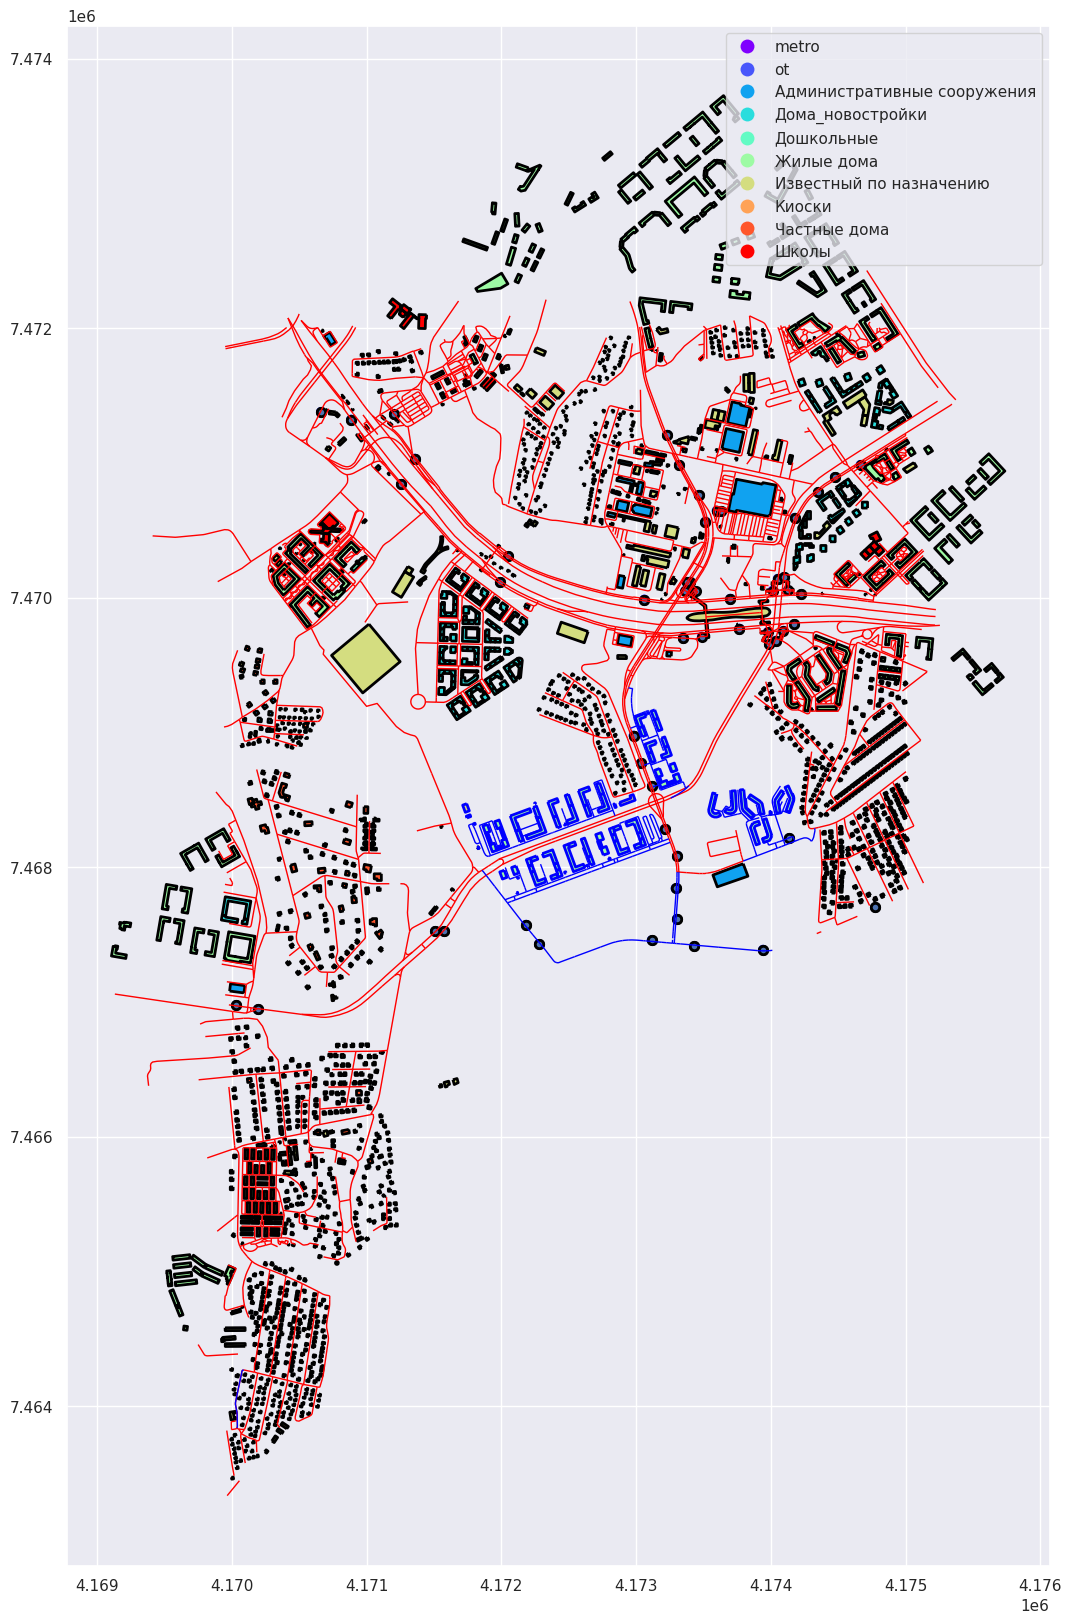

In [30]:
ax = simple_house.plot(cmap="rainbow", figsize=(20, 20), column='type', legend=True)
simple_house[simple_house['new'] != 'new'].plot(ax=ax, facecolor="none", edgecolor="black", linewidth=2)
simple_house[simple_house['new'] == 'new'].plot(ax=ax, facecolor="none", edgecolor="blue", linewidth=2)
simple_street[simple_street['new'] == 'old'].plot(ax=ax, facecolor="none", linewidth=1, edgecolor="red")
simple_street[simple_street['new'] == 'new'].plot(ax=ax, facecolor="none", linewidth=1, edgecolor="blue")

In [31]:
# Преобразование геометрий домов и улиц в точки для быстрого вычисления расстояний
house_points = [Point(geom.centroid.x, geom.centroid.y) for geom in simple_house.geometry]
street_points = [Point(geom.centroid.x, geom.centroid.y) for geom in simple_street.geometry]

# Создание KDTree для быстрого поиска ближайших соседей
house_tree = cKDTree([(point.x, point.y) for point in house_points])
street_tree = cKDTree([(point.x, point.y) for point in street_points])

# Функция для выбора домов и улиц в радиусе 500 метров от конкретного дома
def select_nearby_houses_and_streets(house_idx, radius=2000):
    global simple_house
    global simple_street
    # Найти все дома в радиусе 500 метров от конкретного дома
    house_point = house_points[house_idx]
    nearby_house_indices = house_tree.query_ball_point((house_point.x, house_point.y), radius)
    nearby_houses = simple_house.iloc[nearby_house_indices]

    # Найти все улицы в радиусе 500 метров от конкретного дома
    nearby_street_indices = street_tree.query_ball_point((house_point.x, house_point.y), radius)
    nearby_streets = simple_street.iloc[nearby_street_indices]

    return nearby_houses, nearby_streets

In [32]:
simple_house[simple_house['new'] == 'new'].index

Index([1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634,
       1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646,
       1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658,
       1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667],
      dtype='int64')

In [33]:
house_idx = simple_house[simple_house['new'] == 'new'].index.to_list()  # Индекс конкретного дома

nearby_houses = gpd.GeoDataFrame()
nearby_streets = gpd.GeoDataFrame()

for indx in tqdm(house_idx):
    nearby_houses_indx, nearby_streets_indx = select_nearby_houses_and_streets(indx, 2100)
    nearby_houses = pd.concat([nearby_houses, nearby_houses_indx]).drop_duplicates()
    nearby_streets = pd.concat([nearby_streets, nearby_streets_indx]).drop_duplicates()
nearby_houses.shape, nearby_streets.shape

100%|██████████| 45/45 [00:10<00:00,  4.39it/s]


((968, 5), (1734, 3))

<Axes: >

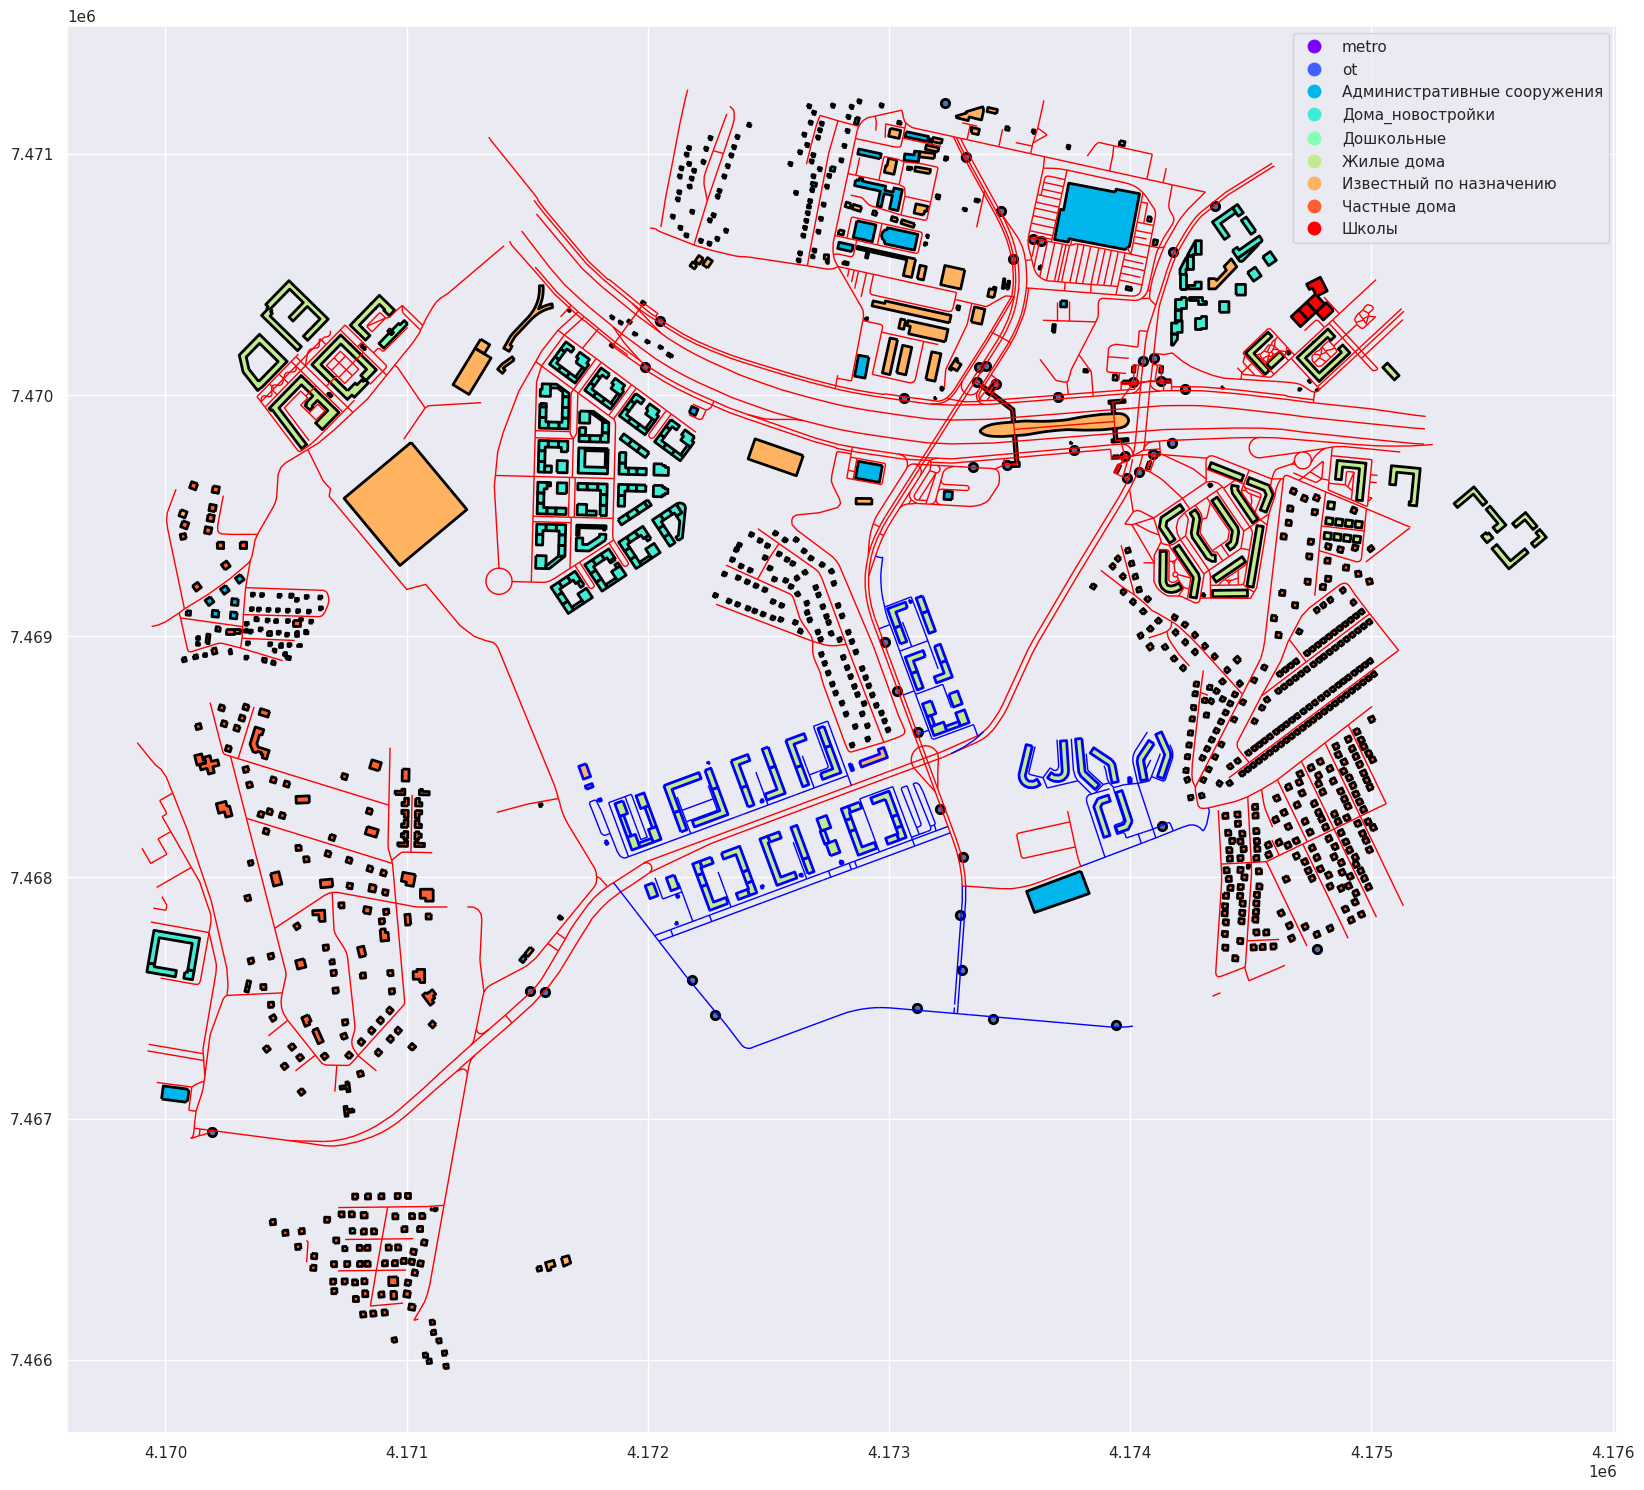

In [34]:
ax = nearby_houses.plot(cmap="rainbow", figsize=(20, 20), column='type', legend=True)
nearby_houses[nearby_houses['new'] != 'new'].plot(ax=ax, facecolor="none", edgecolor="black", linewidth=2)
nearby_houses[nearby_houses['new'] == 'new'].plot(ax=ax, facecolor="none", edgecolor="blue", linewidth=2)
nearby_streets[nearby_streets['new'] == 'old'].plot(ax=ax, facecolor="none", linewidth=1, edgecolor="red")
nearby_streets[nearby_streets['new'] == 'new'].plot(ax=ax, facecolor="none", linewidth=1, edgecolor="blue")

100%|██████████| 45/45 [00:02<00:00, 19.03it/s]


(197, 5)

(440, 3)

<Axes: >

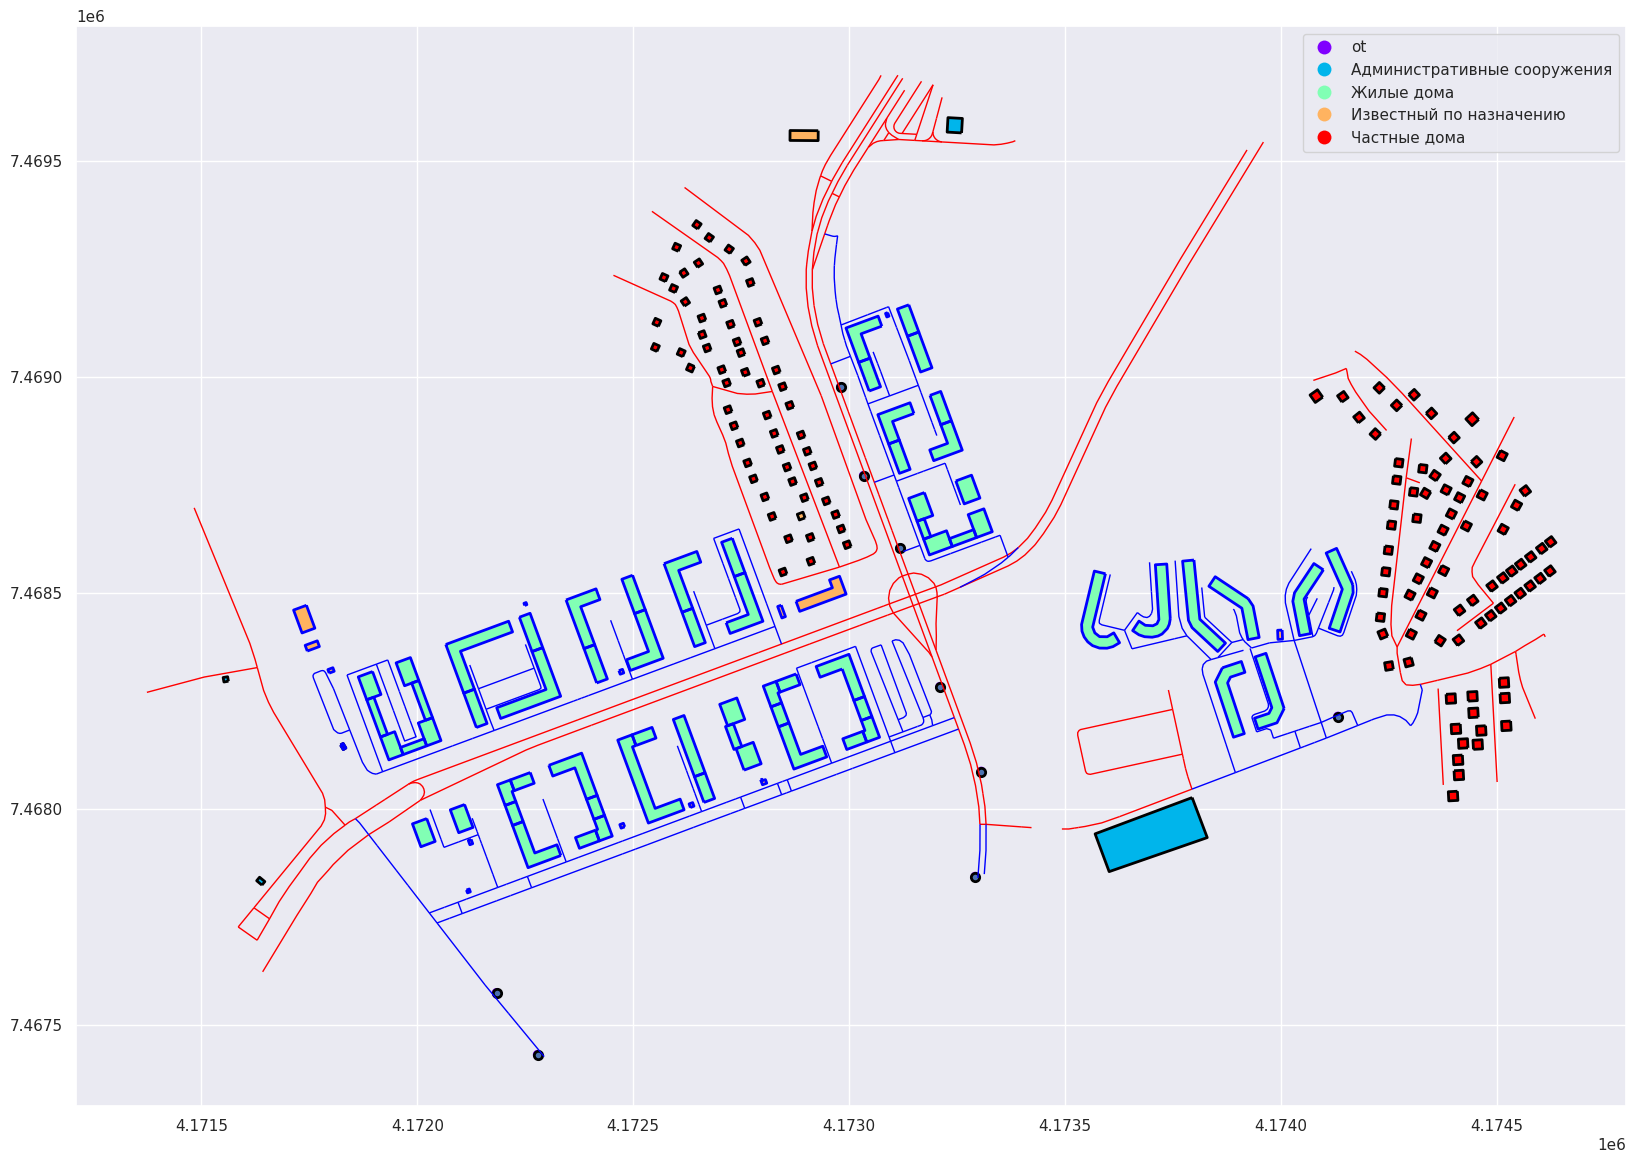

In [264]:
house_idx = simple_house[simple_house['new'] == 'new'].index.to_list()  # Индекс конкретного дома

nearby_houses_close = gpd.GeoDataFrame()
nearby_streets_close = gpd.GeoDataFrame()

for indx in tqdm(house_idx):
    nearby_houses_indx, nearby_streets_indx = select_nearby_houses_and_streets(indx, 500)
    nearby_houses_close = pd.concat([nearby_houses_close, nearby_houses_indx]).drop_duplicates()
    nearby_streets_close = pd.concat([nearby_streets_close, nearby_streets_indx]).drop_duplicates()
display(nearby_houses_close.shape, nearby_streets_close.shape)

ax = nearby_houses_close.plot(cmap="rainbow", figsize=(20, 20), column='type', legend=True)
nearby_houses_close[nearby_houses_close['new'] != 'new'].plot(ax=ax, facecolor="none", edgecolor="black", linewidth=2)
nearby_houses_close[nearby_houses_close['new'] == 'new'].plot(ax=ax, facecolor="none", edgecolor="blue", linewidth=2)
nearby_streets_close[nearby_streets_close['new'] == 'old'].plot(ax=ax, facecolor="none", linewidth=1, edgecolor="red")
nearby_streets_close[nearby_streets_close['new'] == 'new'].plot(ax=ax, facecolor="none", linewidth=1, edgecolor="blue")

## Create graph in networkx

In [126]:
import networkx as nx
from shapely.geometry import LineString

def get_houses_near_information(houses_list):
    types_houses = houses_list['type'].unique().tolist()
    return {
        'persons': houses_list['persons'].sum(),
        'type_ot': 'ot' in types_houses,
        'type_houses': 'Жилые дома' in types_houses,
        'type_admin': 'Административные сооружения' in types_houses,
        'type_new_houses': 'Дома_новостройки' in types_houses,
        'type_know': 'Известный по назначению' in types_houses,
        'type_school': 'Школы' in types_houses,
        'type_school_lite': 'Дошкольные' in types_houses,
        'type_own': 'Частные дома' in types_houses,
        'type_metro': 'metro' in types_houses,
        'new': 'new' in houses_list['new'].unique().tolist(),
    }


def lines_to_graph(gdf_street, gdf_houses, radius=100):
    G = nx.Graph()

    house_points = [Point(geom.centroid.x, geom.centroid.y) for geom in gdf_houses.geometry]
    house_tree = cKDTree([(point.x, point.y) for point in house_points])

    all_streets = list(gdf_street.iterrows())
    for idx, row in tqdm(all_streets):
        line = row.geometry
        if isinstance(line, LineString):
            coords = list(line.coords)
            for i in range(len(coords) - 1):
                start_point = Point(coords[i])
                end_point = Point(coords[i + 1])

                houses_near_point1 = gdf_houses.iloc[house_tree.query_ball_point((start_point.centroid.x, start_point.centroid.y), radius), :]
                houses_near_point2 = gdf_houses.iloc[house_tree.query_ball_point((end_point.centroid.x, end_point.centroid.y), radius), :]
                point1_data = get_houses_near_information(houses_near_point1)
                point2_data = get_houses_near_information(houses_near_point2)

                G.add_node(
                    coords[i], 
                    pos=(start_point.centroid.x, start_point.centroid.y), 
                    type_ot=point1_data['type_ot'], 
                    type_metro=point1_data['type_metro'], 
                    type_houses=point1_data['type_houses'], 
                    type_admin=point1_data['type_admin'], 
                    type_new_houses=point1_data['type_new_houses'], 
                    type_know=point1_data['type_know'], 
                    type_own=point1_data['type_own'], 
                    type_school=point1_data['type_school'], 
                    type_school_lite=point1_data['type_school_lite'], 
                    new=point1_data['new'], 
                    persons=point1_data['persons']
                )

                G.add_node(
                    coords[i+1], 
                    pos=(end_point.centroid.x, end_point.centroid.y), 
                    type_ot=point2_data['type_ot'], 
                    type_metro=point2_data['type_metro'], 
                    type_houses=point2_data['type_houses'], 
                    type_admin=point2_data['type_admin'], 
                    type_new_houses=point2_data['type_new_houses'], 
                    type_know=point2_data['type_know'], 
                    type_own=point2_data['type_own'], 
                    type_school=point2_data['type_school'], 
                    type_school_lite=point2_data['type_school_lite'], 
                    new=point2_data['new'], 
                    persons=point2_data['persons']
                )
                G.add_edge(coords[i], coords[i + 1], weight=start_point.distance(end_point), new='new' == row.new, power=0)

    return G

# Преобразование координат типа LineString в граф
G = lines_to_graph(nearby_streets, nearby_houses)

pos = {node: (node[0], node[1]) for node in G.nodes()}

100%|██████████| 1734/1734 [00:07<00:00, 237.65it/s]


In [127]:
len(G.nodes())

3369

In [128]:
def downgrade_graph(G, distance=10):
    nodes_for_merge_uniq = []
    nodes_for_merge = []
    for node1 in tqdm(G.nodes()):
        if node1 in nodes_for_merge_uniq:
            continue
        for node2 in G.nodes():
            if node2 in nodes_for_merge_uniq or node1 == node2:
                continue
            try:
                if G[node1][node2]['weight'] <= distance:
                    nodes_for_merge.append((node1, node2))
                    nodes_for_merge_uniq.extend([node1, node2])
            except Exception as ex:
                continue

    G_down = G.copy()
    for node1, node2 in nodes_for_merge:
        G_down = nx.contracted_nodes(G_down, node1, node2, self_loops=False)
    return G_down

G_down = downgrade_graph(G, 30)
G_down = downgrade_graph(G_down, 30)
G_down = downgrade_graph(G_down, 30)

100%|██████████| 1519/1519 [00:14<00:00, 103.84it/s]


In [129]:
len(G_down.nodes())

1317

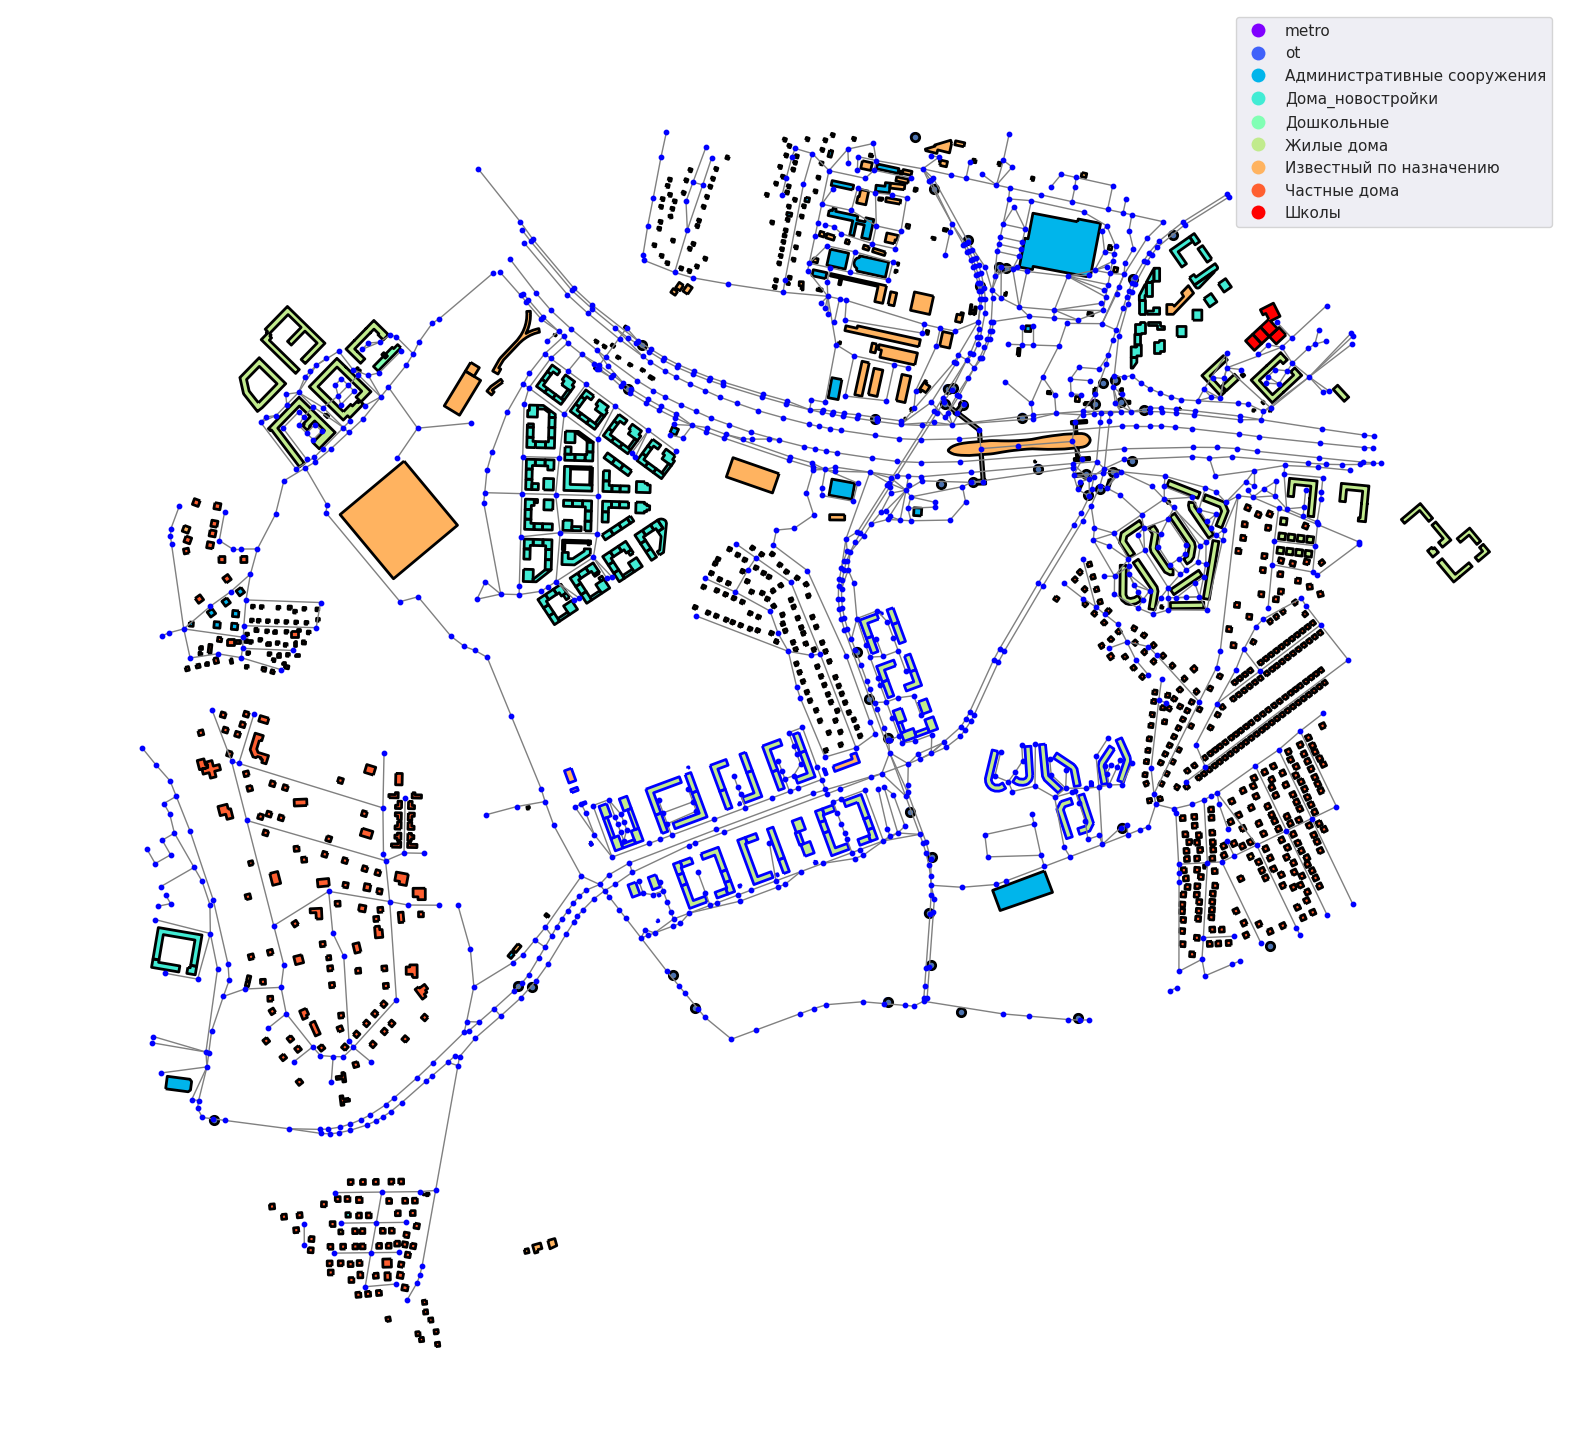

In [55]:
ax = nearby_houses.plot(cmap="rainbow", figsize=(20, 20), column='type', legend=True)
nearby_houses[nearby_houses['new'] != 'new'].plot(ax=ax, facecolor="none", edgecolor="black", linewidth=2)
nearby_houses[nearby_houses['new'] == 'new'].plot(ax=ax, facecolor="none", edgecolor="blue", linewidth=2)

nx.draw(G_down, pos, with_labels=False, node_size=10, node_color='blue', edge_color='gray', ax=ax)

In [ ]:
ax = nearby_houses.plot(cmap="rainbow", figsize=(20, 20), column='type', legend=True)
nearby_houses[nearby_houses['new'] != 'new'].plot(ax=ax, facecolor="none", edgecolor="black", linewidth=2)
nearby_houses[nearby_houses['new'] == 'new'].plot(ax=ax, facecolor="none", edgecolor="blue", linewidth=2)

nx.draw(G, pos, with_labels=False, node_size=10, node_color='blue', edge_color='gray', ax=ax)

# Main Flow

## Симуляция

In [130]:
G = G_down.copy()

In [131]:
for edge in G.edges(data=True):
    edge[2]['power'] = 0

In [132]:
houses_nodes = []
ot_nodes = []
metro_nodes = []
admin_nodes = []
school_nodes = []

for node in G.nodes(data=True):
    data = node[1]
    if data['type_houses'] or data['type_own'] or data['type_new_houses']:
        houses_nodes.append(node)
    if data['type_metro']:
        metro_nodes.append(node)
    if data['type_admin']:
        admin_nodes.append(node)
    if data['type_school'] or data['type_school_lite']:
        school_nodes.append(node)
    if data['type_ot']:
        ot_nodes.append(node)
print('Houses count: ', len(houses_nodes))
print('OT count: ', len(ot_nodes))
print('Metro count: ', len(metro_nodes))
print('Admin count: ', len(admin_nodes))
print('School count: ', len(school_nodes))

Houses count:  341
OT count:  196
Metro count:  51
Admin count:  92
School count:  7


In [133]:
import random

def get_metro_chek(node, radius):
    radius = radius or 0
    global metro_nodes
    
    metro_list = []
    for node_target in metro_nodes:
        try:
            lenght, path = nx.single_source_dijkstra(G, source=node[0], target=node_target[0], weight='weight')
            if lenght <= radius:
                metro_list.append((lenght, path))
        except Exception as ex:
            continue
        
    if len(metro_list) == 0:
        return []
        
    path_sorted = sorted(metro_list, key=lambda x: x[0])[0]

    chance = [1, 1, 1, 0]

    if random.choice(chance) == 0:
        return []
    
    return path_sorted
        

def add_capacity(G, target_nodes, person_weight, radius = None, random_check = False, metro_chek = False):
    global houses_nodes

    if len(target_nodes) == 0:
        return G
    
    for node_h in tqdm(houses_nodes):
        person_count = node_h[1]['persons'] * person_weight
        # print(person_count)
        ot_list = []
        for node_target in target_nodes:
            try:
                lenght, path = nx.single_source_dijkstra(G, source=node_h[0], target=node_target[0], weight='weight')
                if radius:
                    if lenght <= radius:
                        ot_list.append((lenght, path))
                else:
                    ot_list.append((lenght, path))
            except Exception as ex:
                continue
    
        if len(ot_list) == 0:
            continue
        
        path_sorted = sorted(ot_list, key=lambda x: x[0])

        if metro_chek:
            path_metro = get_metro_chek(node_h, radius)
            path_sorted = [path_metro] if len(path_metro) != 0 else path_sorted
            
        if random_check:
            path = random.choice(path_sorted[:4])[1]
        else:
            path = path_sorted[0][1]
    
        for i in range(len(path)-1):
            G[path[i]][path[i + 1]]['power'] += person_count
    
    return G

### Из домов на ОТ или Метро

Предполагаем, что из жилых домов до ближайшей остановки ходит X % людей.

In [134]:
G = add_capacity(G, ot_nodes, 0.45, random_check=True, metro_chek=True, radius=1600)

100%|██████████| 341/341 [04:18<00:00,  1.32it/s]


### Из жилых домов в школу

In [135]:
G = add_capacity(G, school_nodes, 0.15)

100%|██████████| 341/341 [00:15<00:00, 22.51it/s]


### Из жилых домов в административные здания

In [136]:
G = add_capacity(G, admin_nodes, 0.2, random_check=True)

100%|██████████| 341/341 [02:17<00:00,  2.48it/s]


In [75]:
sum([e[2]['power'] for e in G.edges(data=True)]) / len(G_plot.edges())

678.9163810137458

In [76]:
max([e[2]['power'] for e in G.edges(data=True)])

22479.800000000003

In [74]:
G_plot = G.copy()

for edge in G_plot.edges(data=True):
    if edge[2]['power'] >= 12000:
        edge[2]['power'] = 12000

<Axes: >

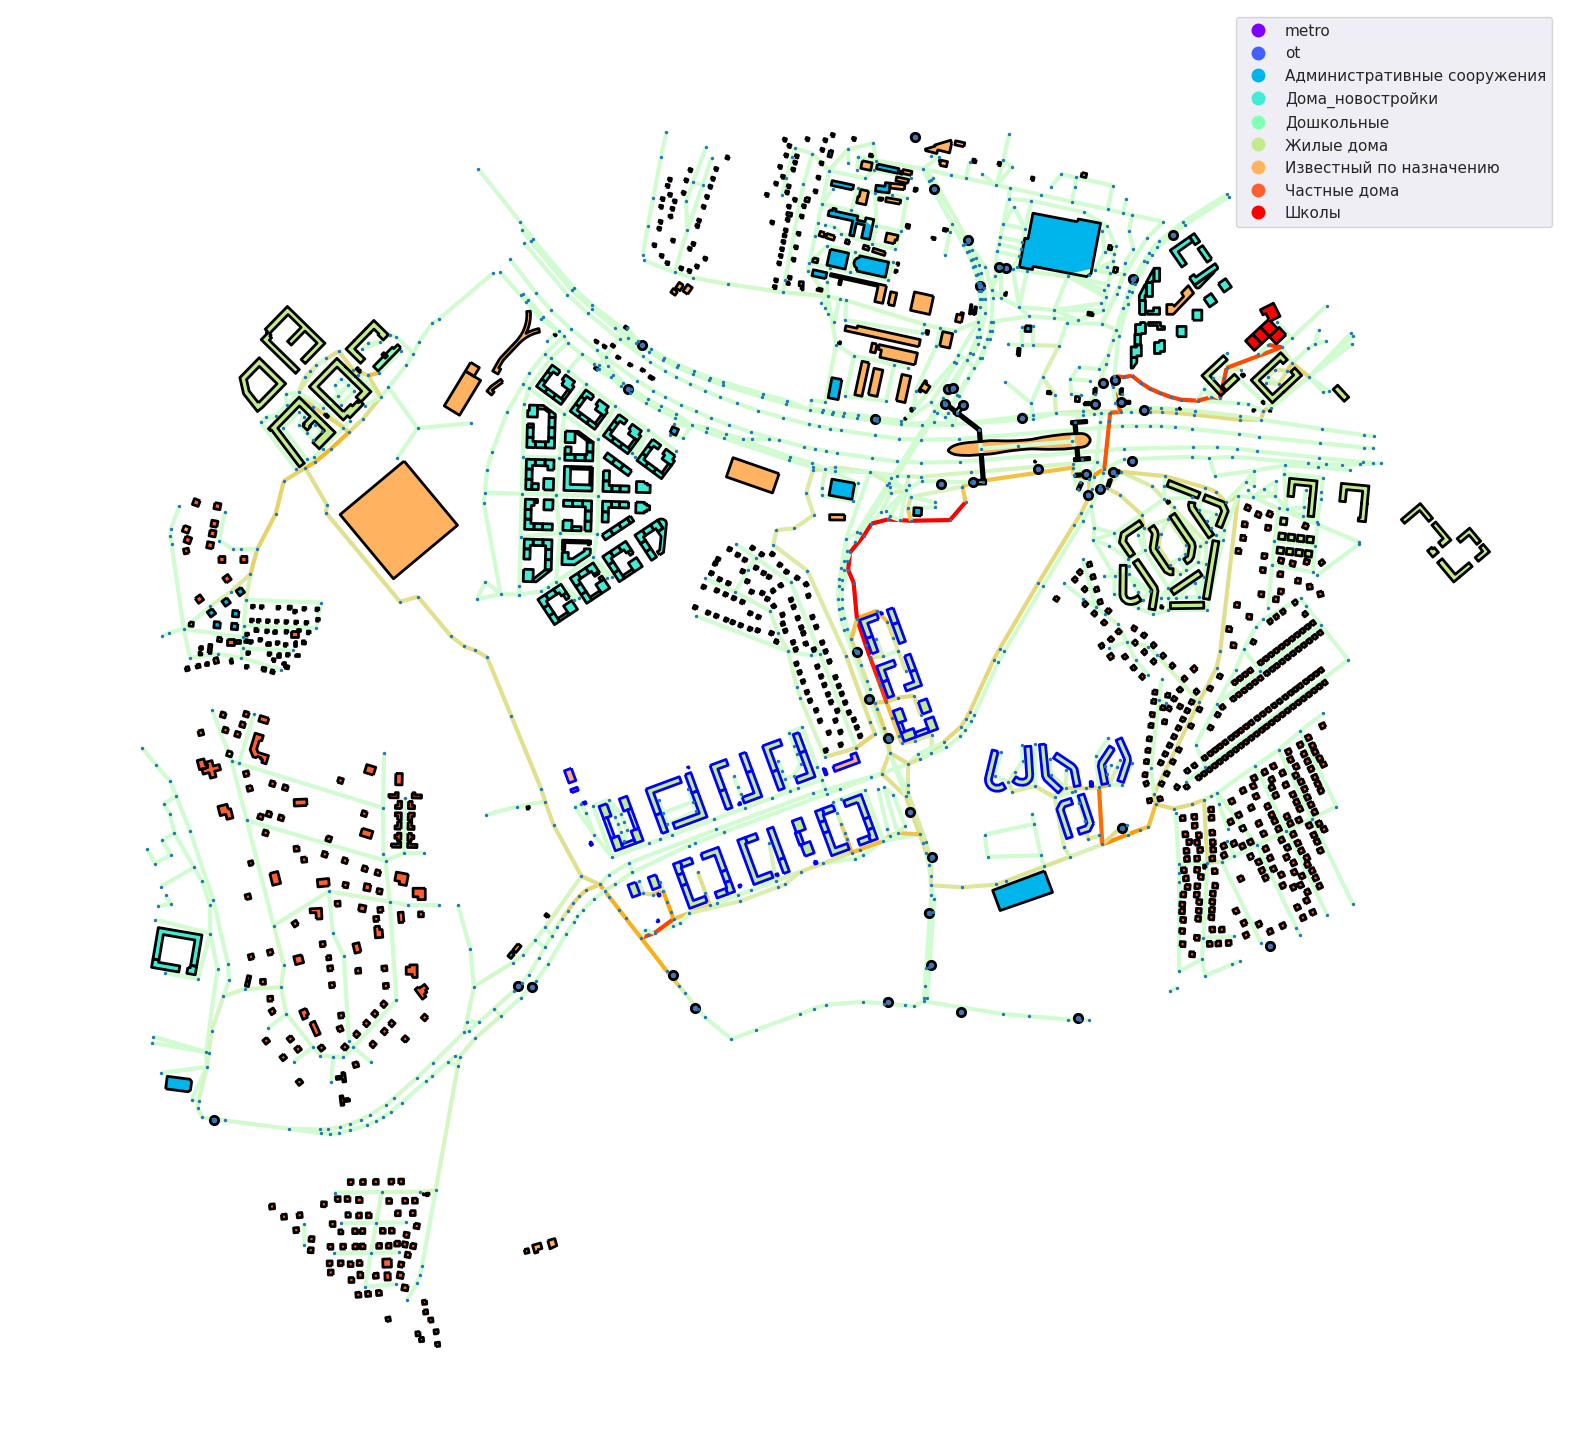

In [137]:
import matplotlib.colors as mcolors

ax = nearby_houses.plot(cmap="rainbow", figsize=(20, 20), column='type', legend=True)

colors = [
    (0.0, (0.82, 0.99, 0.82)),  # Зеленый в начале
    (0.5, 'orange'), # Желтый в середине
    (1.0, 'red')     # Красный в конце
]

cmap = mcolors.LinearSegmentedColormap.from_list('green_yellow_red', colors)

edges,weights = zip(*nx.get_edge_attributes(G_plot,'power').items())
nx.draw(G_plot, pos, with_labels=False, node_size=2, edgelist=edges, edge_color=weights, edge_cmap=cmap, ax=ax, width=3.0)

nearby_houses[nearby_houses['new'] != 'new'].plot(ax=ax, facecolor="none", edgecolor="black", linewidth=2)
nearby_houses[nearby_houses['new'] == 'new'].plot(ax=ax, facecolor="none", edgecolor="blue", linewidth=2)

In [78]:
import json

graph_front_data = []
for e in G_plot.edges(data=True):
    graph_front_data.append((e[0], e[1], e[2]['power']))

with open('base.json', 'w') as f:
    json.dump(graph_front_data, f)

# New link recommendation Part 1

In [141]:
new_houses = []

for node in G.nodes(data=True):
    data = node[1]
    if data['new']:
        new_houses.append(node[0])

print('New Houses count: ', len(new_houses))

New Houses count:  114


In [142]:
nodes_for_subgraph = new_houses.copy()

for node_n in new_houses:
    for node in G.nodes():
        try:
            if G[node_n][node]['weight'] <= 500:
               nodes_for_subgraph.append(node)
        except:
            continue

G_current = G.subgraph(nodes_for_subgraph)
len(G_current.nodes()), len(G_current.edges())

(158, 157)

In [143]:
house_idx = simple_house[simple_house['new'] == 'new'].index.to_list()  # Индекс конкретного дома

nearby_houses_close = gpd.GeoDataFrame()
nearby_streets_close = gpd.GeoDataFrame()

for indx in tqdm(house_idx):
    nearby_houses_indx, nearby_streets_indx = select_nearby_houses_and_streets(indx, 300)
    nearby_houses_close = pd.concat([nearby_houses_close, nearby_houses_indx]).drop_duplicates()
    nearby_streets_close = pd.concat([nearby_streets_close, nearby_streets_indx]).drop_duplicates()
display(nearby_houses_close.shape, nearby_streets_close.shape)

100%|██████████| 45/45 [00:01<00:00, 23.60it/s]


(110, 5)

(365, 3)

<Axes: >

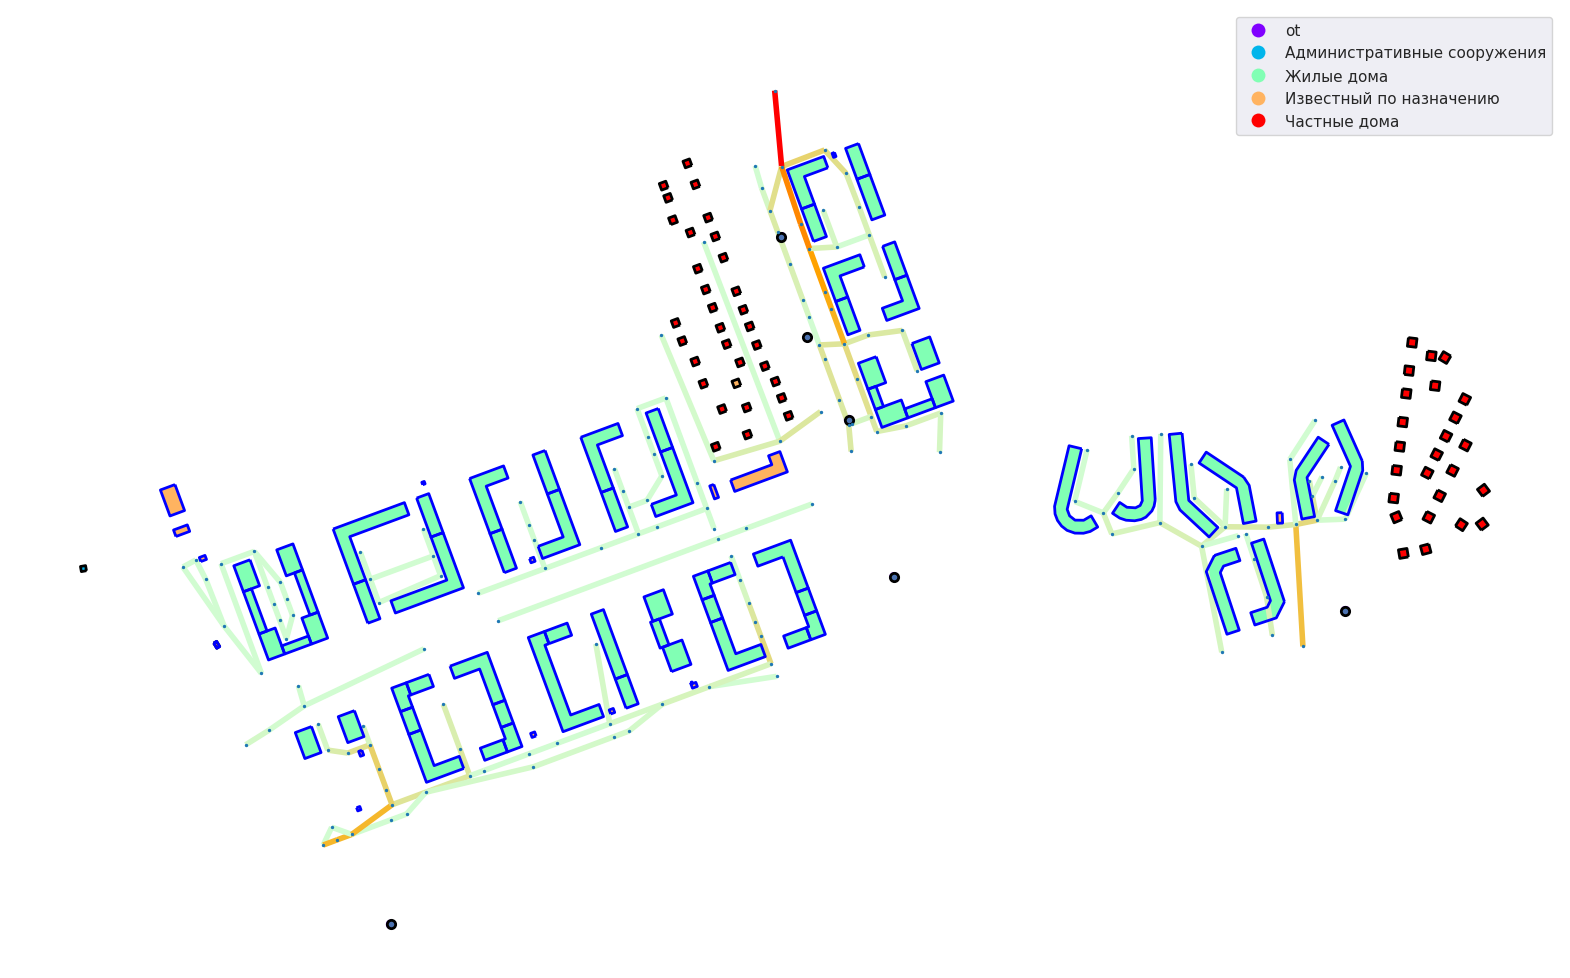

In [144]:
import matplotlib.colors as mcolors

ax = nearby_houses_close.plot(cmap="rainbow", figsize=(20, 20), column='type', legend=True)

colors = [
    (0.0, (0.82, 0.99, 0.82)),  # Зеленый в начале
    (0.5, 'orange'), # Желтый в середине
    (1.0, 'red')     # Красный в конце
]

cmap = mcolors.LinearSegmentedColormap.from_list('green_yellow_red', colors)

edges,weights = zip(*nx.get_edge_attributes(G_current,'power').items())
nx.draw(G_current, pos, with_labels=False, node_size=2, edgelist=edges, edge_color=weights, edge_cmap=cmap, ax=ax, width=4.0)

nearby_houses_close[nearby_houses_close['new'] != 'new'].plot(ax=ax, facecolor="none", edgecolor="black", linewidth=2)
nearby_houses_close[nearby_houses_close['new'] == 'new'].plot(ax=ax, facecolor="none", edgecolor="blue", linewidth=2)

In [86]:
print('MAE по загруженности', sum([e[2]['power'] for e in G_current.edges(data=True)]) / len(G_current.edges()))
print('MAX по загруженности', max([e[2]['power'] for e in G_current.edges(data=True)]))

MAE по загруженности 1711.4589171974526
MAX по загруженности 22479.800000000003


In [149]:
def create_recommend_points(G, radius=50):
    node_points = [Point(geom[0], geom[1]) for geom in G_current.nodes()]
    node_tree = cKDTree([(point.x, point.y) for point in node_points])

    for node1 in tqdm(G.nodes(data=True)):
        if node1[1]['new'] is False:
            continue
        start_point = Point(node1[0])
        near_points = node_tree.query_ball_point((start_point.x, start_point.y), radius)
        near_points = [node_points[i] for i in near_points if node_points[i].x != start_point.x and node_points[i].y != start_point.y]

        for node2 in near_points:
            if nearby_houses_close.geometry.intersects(LineString([start_point, node2])).any():
                print('intersects')
                continue
            G.add_edge(node1[0], (node2.x, node2.y), weight=start_point.distance(node2), recommend=True, power=0)

    return G

# Преобразование координат типа LineString в граф
G_rec = create_recommend_points(G_current.copy())

pos = {node: (node[0], node[1]) for node in G_rec.nodes()}

100%|██████████| 158/158 [00:00<00:00, 916.83it/s]


<Axes: >

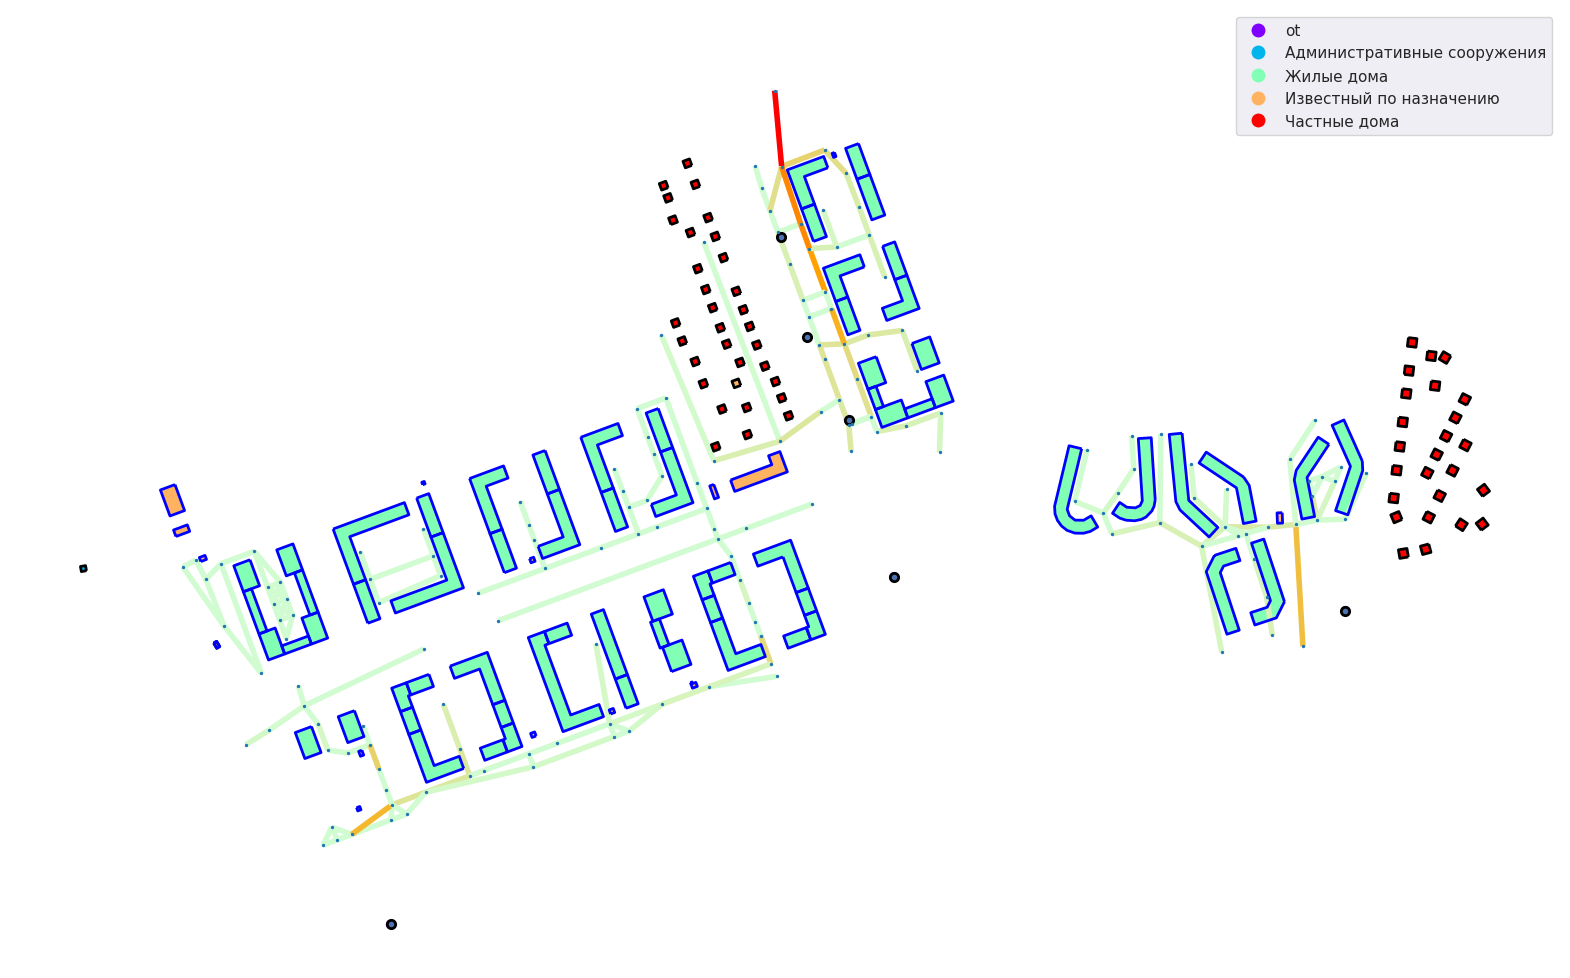

In [150]:
import matplotlib.colors as mcolors

ax = nearby_houses_close.plot(cmap="rainbow", figsize=(20, 20), column='type', legend=True)

colors = [
    (0.0, (0.82, 0.99, 0.82)),  # Зеленый в начале
    (0.5, 'orange'), # Желтый в середине
    (1.0, 'red')     # Красный в конце
]

cmap = mcolors.LinearSegmentedColormap.from_list('green_yellow_red', colors)

edges,weights = zip(*nx.get_edge_attributes(G_rec,'power').items())
nx.draw(G_rec, pos, with_labels=False, node_size=2, edgelist=edges, edge_color=weights, edge_cmap=cmap, ax=ax, width=4.0)

nearby_houses_close[nearby_houses_close['new'] != 'new'].plot(ax=ax, facecolor="none", edgecolor="black", linewidth=2)
nearby_houses_close[nearby_houses_close['new'] == 'new'].plot(ax=ax, facecolor="none", edgecolor="blue", linewidth=2)

## Apply recommendation to exist

In [151]:
G = G_down.copy()

for edge in G_rec.edges(data=True):
    if 'recommend' not in edge[2]:
        continue

    G.add_edge(edge[0], edge[1], weight=edge[2]['weight'], recommend=True, power=0)


for edge in G.edges(data=True):
    edge[2]['power'] = 0

In [152]:
G = add_capacity(G, ot_nodes, 0.45, random_check=True, metro_chek=True, radius=1600)
G = add_capacity(G, school_nodes, 0.15)
G = add_capacity(G, admin_nodes, 0.2, random_check=True)

100%|██████████| 341/341 [02:42<00:00,  2.10it/s]


In [157]:
nodes_for_subgraph = new_houses.copy()

for node_n in new_houses:
    for node in G.nodes():
        try:
            if G[node_n][node]['weight'] <= 500:
                if 'recommend' in G[node_n][node]:
                    if G[node_n][node]['power'] > 100:
                        nodes_for_subgraph.append(node)
                    else:
                        G.remove_edge(noden, node)
                else:
                    nodes_for_subgraph.append(node)
        except:
            continue

G_current = G.subgraph(nodes_for_subgraph)
len(G_current.nodes()), len(G_current.edges())

(157, 186)

In [158]:
import json

graph_front_data = []
for e in G.edges(data=True):
    graph_front_data.append((e[0], e[1], e[2]['power']))

with open('base_rec.json', 'w') as f:
    json.dump(graph_front_data, f)

In [159]:
import pickle

# save graph object to file
pickle.dump(G_current, open('first_iter.pickle', 'wb'))

# load graph object from file
# G = pickle.load(open('filename.pickle', 'rb'))

<Axes: >

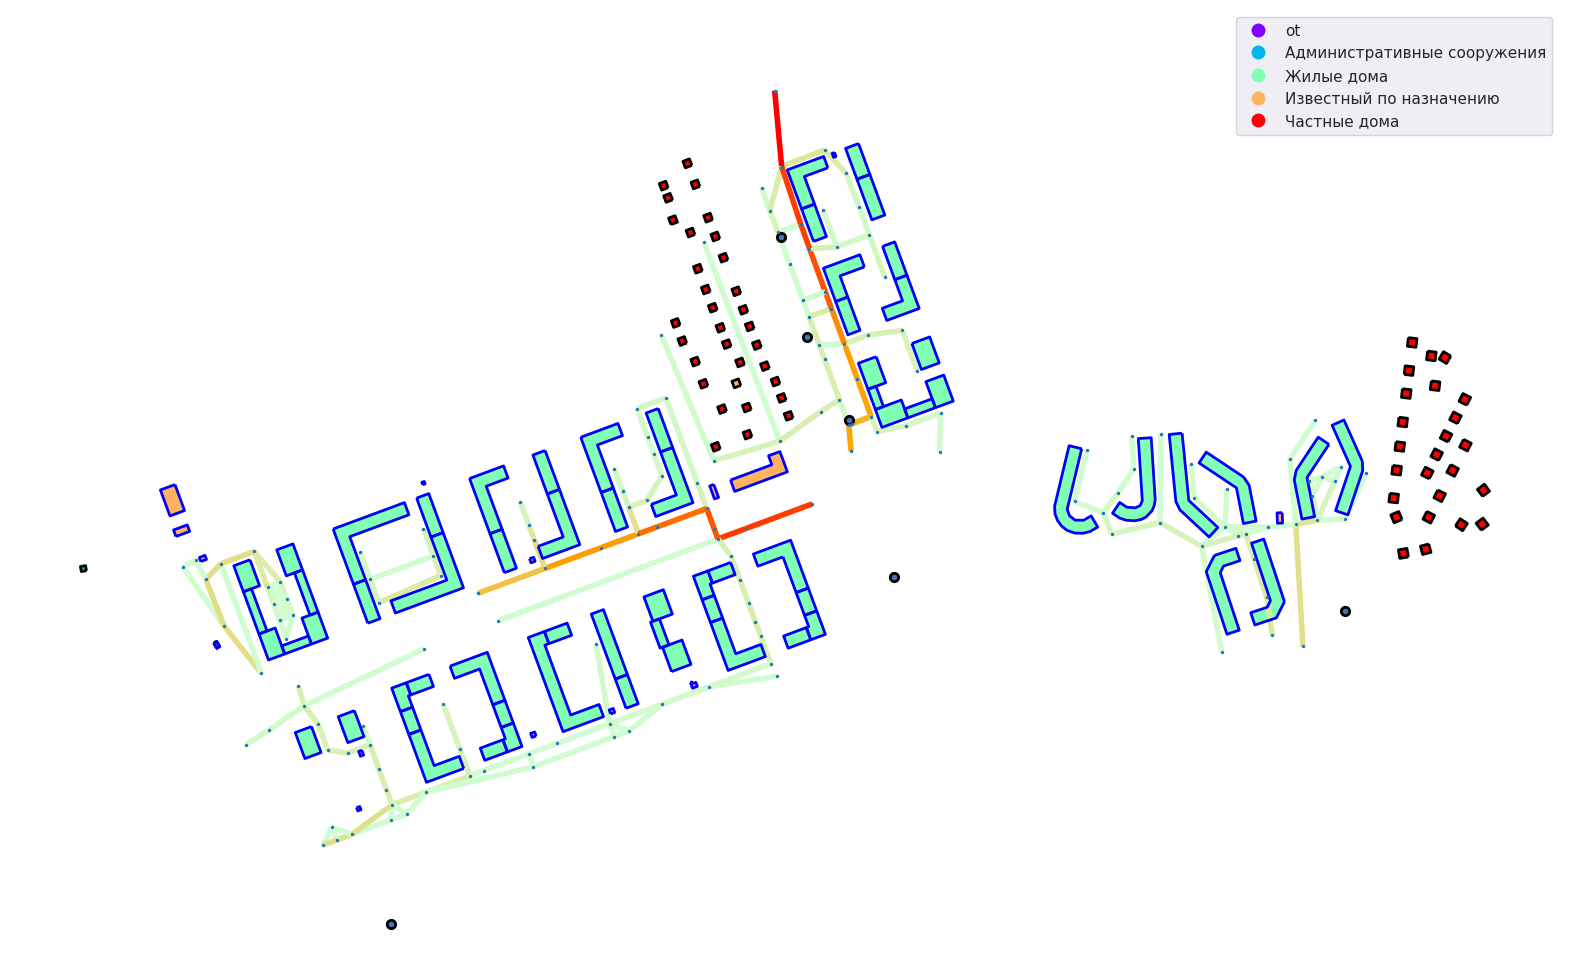

In [155]:
import matplotlib.colors as mcolors

ax = nearby_houses_close.plot(cmap="rainbow", figsize=(20, 20), column='type', legend=True)

colors = [
    (0.0, (0.82, 0.99, 0.82)),  # Зеленый в начале
    (0.5, 'orange'), # Желтый в середине
    (1.0, 'red')     # Красный в конце
]

cmap = mcolors.LinearSegmentedColormap.from_list('green_yellow_red', colors)

edges,weights = zip(*nx.get_edge_attributes(G_current,'power').items())
nx.draw(G_current, pos, with_labels=False, node_size=2, edgelist=edges, edge_color=weights, edge_cmap=cmap, ax=ax, width=4.0)

nearby_houses_close[nearby_houses_close['new'] != 'new'].plot(ax=ax, facecolor="none", edgecolor="black", linewidth=2)
nearby_houses_close[nearby_houses_close['new'] == 'new'].plot(ax=ax, facecolor="none", edgecolor="blue", linewidth=2)

In [156]:
print('MAE по загруженности', sum([e[2]['power'] for e in G_current.edges(data=True)]) / len(G_current.edges()))
print('MAX по загруженности', max([e[2]['power'] for e in G_current.edges(data=True)]))

MAE по загруженности 3672.6655913978493
MAX по загруженности 34966.40000000002


In [160]:
G_plot = G.copy()

for edge in G_plot.edges(data=True):
    if edge[2]['power'] >= 12000:
        edge[2]['power'] = 12000

In [164]:
G[(4172543.84, 7467336.43)]

AtlasView({(4172437.71, 7467297.07): {'weight': 113.19357976461986, 'new': True, 'power': 0}, (4172735.09, 7467407.36): {'weight': 203.97947788954124, 'new': True, 'power': 0}})

<Axes: >

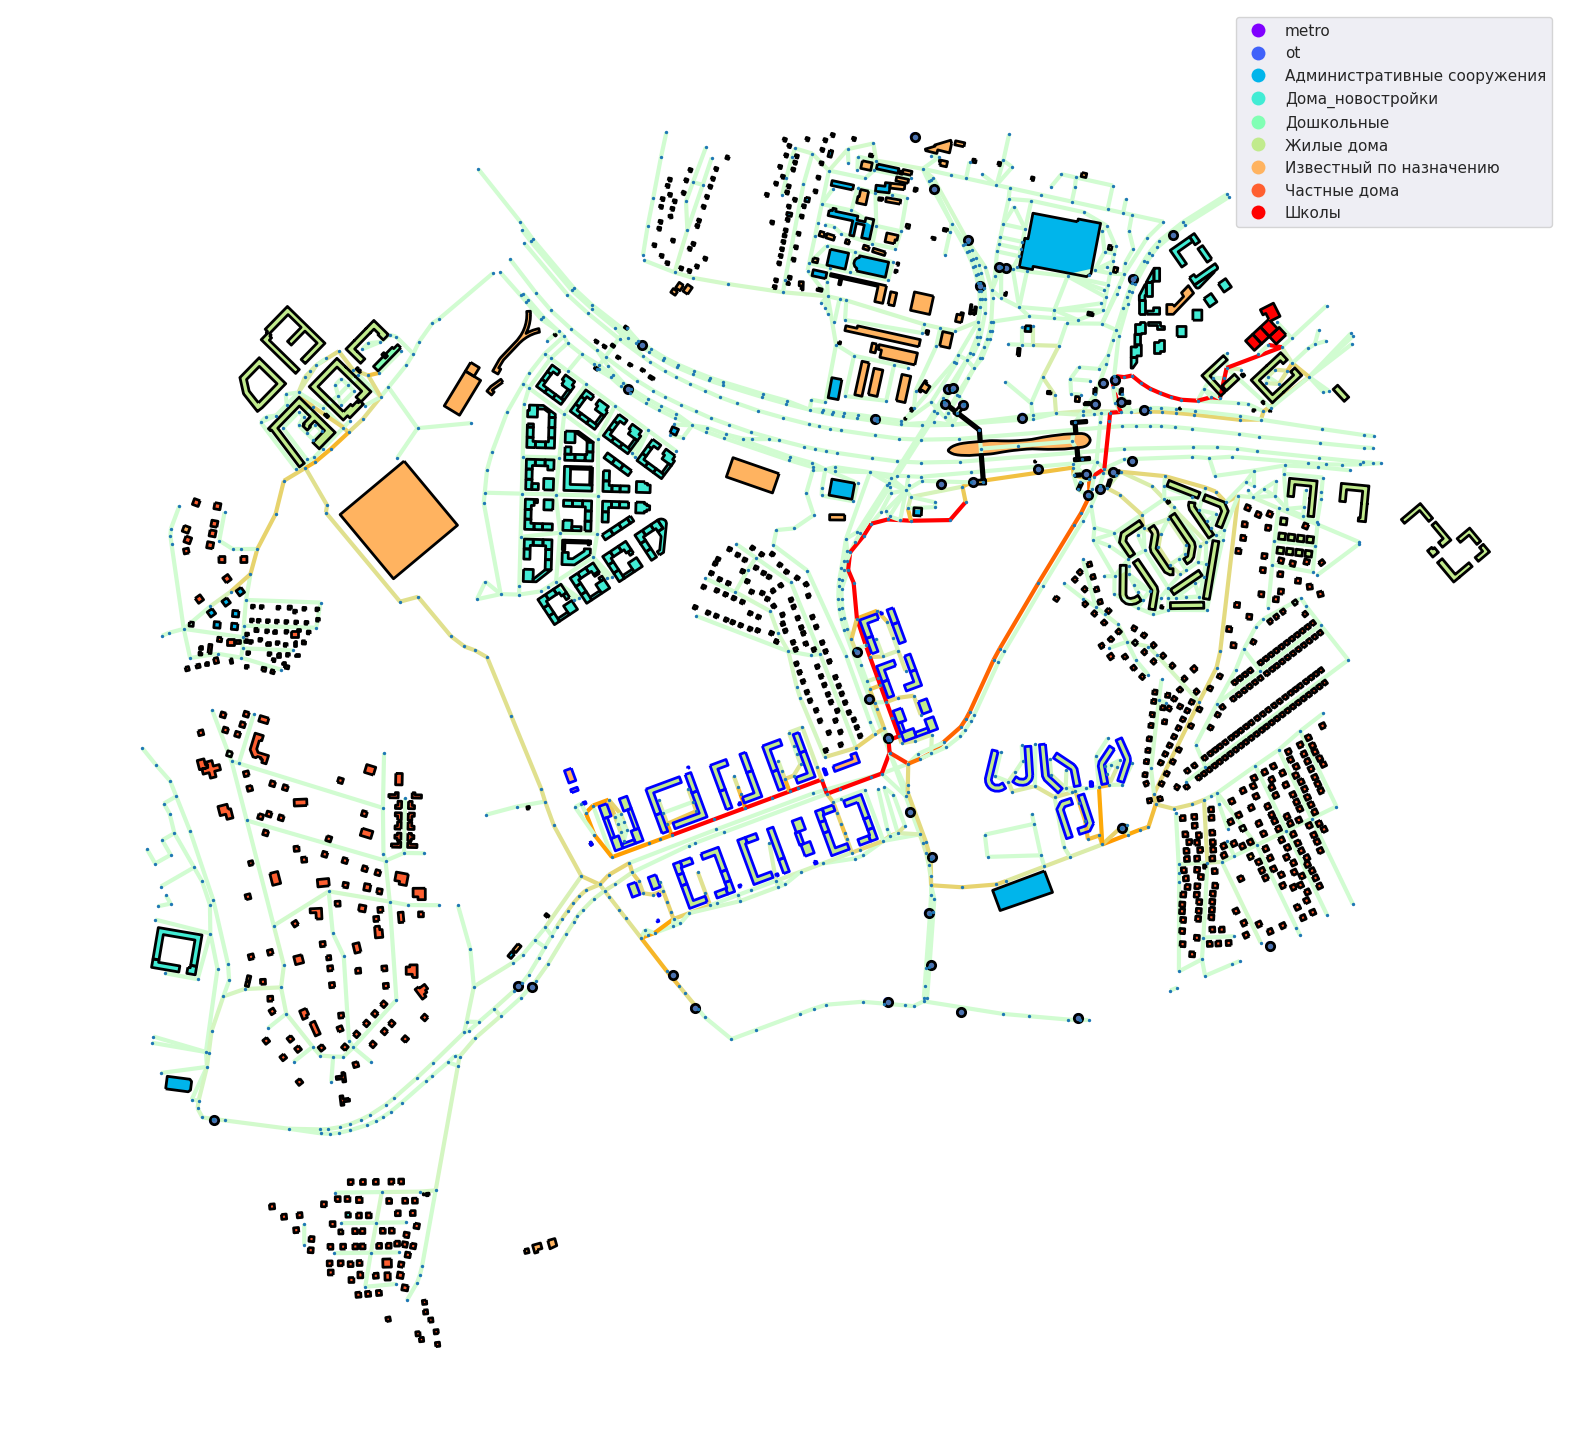

In [165]:
import matplotlib.colors as mcolors

pos = {node: (node[0], node[1]) for node in G_plot.nodes()}
ax = nearby_houses.plot(cmap="rainbow", figsize=(20, 20), column='type', legend=True)

colors = [
    (0.0, (0.82, 0.99, 0.82)),  # Зеленый в начале
    (0.5, 'orange'), # Желтый в середине
    (1.0, 'red')     # Красный в конце
]

cmap = mcolors.LinearSegmentedColormap.from_list('green_yellow_red', colors)

edges,weights = zip(*nx.get_edge_attributes(G_plot,'power').items())
nx.draw(G_plot, pos, with_labels=False, node_size=2, edgelist=edges, edge_color=weights, edge_cmap=cmap, ax=ax, width=3.0)

nearby_houses[nearby_houses['new'] != 'new'].plot(ax=ax, facecolor="none", edgecolor="black", linewidth=2)
nearby_houses[nearby_houses['new'] == 'new'].plot(ax=ax, facecolor="none", edgecolor="blue", linewidth=2)